# Importing modules and data

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import itertools

In [4]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
test_set_ind = pd.read_csv("../Downloads/test_set_ind.csv")
train_set_val = pd.read_csv("../Downloads/train_set_val.csv")
test_set_val = pd.read_csv("../Downloads/test_set_val.csv")

subset_013_ind = pd.read_csv("../Downloads/subset1_ind.csv")
subset_03_ind = pd.read_csv("../Downloads/subset2_ind.csv")
subset_3_ind = pd.read_csv("../Downloads/subset3_ind.csv")
subset_013_val = pd.read_csv("../Downloads/subset1_val.csv")
subset_03_val = pd.read_csv("../Downloads/subset2_val.csv")
subset_3_val = pd.read_csv("../Downloads/subset3_val.csv")

In [5]:
train_set_ind = train_set_ind.drop(['Unnamed: 0'], axis=1)
test_set_ind = test_set_ind.drop(['Unnamed: 0', 'date'], axis=1)
train_set_val = train_set_val.drop(['Unnamed: 0', 'date'], axis=1)
test_set_val = test_set_val.drop(['Unnamed: 0', 'date'], axis=1)

subset_013_ind = subset_013_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_03_ind = subset_03_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_3_ind = subset_3_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_013_val = subset_013_val.drop(['Unnamed: 0', 'date'], axis=1)
subset_03_val = subset_03_val.drop(['Unnamed: 0', 'date'], axis=1)
subset_3_val = subset_3_val.drop(['Unnamed: 0', 'date'], axis=1)

&nbsp;

&nbsp;

# Transform back to categorical

In [6]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [7]:
for col in train_set_ind.columns:
    for i in category_columns:
        if col == i:
            train_set_ind[col] = train_set_ind[col].astype('category')

In [8]:
for col in test_set_ind.columns:
    for i in category_columns:
        if col == i:
            test_set_ind[col] = test_set_ind[col].astype('category')

In [9]:
for col in train_set_val.columns:
    for i in category_columns:
        if col == i:
            train_set_val[col] = train_set_val[col].astype('category')

In [10]:
for col in test_set_val.columns:
    for i in category_columns:
        if col == i:
            test_set_val[col] = test_set_val[col].astype('category')

In [11]:
for col in subset_013_ind.columns:
    for i in category_columns:
        if col == i:
            subset_013_ind[col] = subset_013_ind[col].astype('category')

In [12]:
for col in subset_03_ind.columns:
    for i in category_columns:
        if col == i:
            subset_03_ind[col] = subset_03_ind[col].astype('category')

In [13]:
for col in subset_3_ind.columns:
    for i in category_columns:
        if col == i:
            subset_3_ind[col] = subset_3_ind[col].astype('category')

In [14]:
for col in subset_013_val.columns:
    for i in category_columns:
        if col == i:
            subset_013_val[col] = subset_013_val[col].astype('category')

In [15]:
for col in subset_03_val.columns:
    for i in category_columns:
        if col == i:
            subset_03_val[col] = subset_03_val[col].astype('category')

In [16]:
for col in subset_3_val.columns:
    for i in category_columns:
        if col == i:
            subset_3_val[col] = subset_3_val[col].astype('category')

&nbsp;

&nbsp;

# Transform fourth wave to validation set for tuning hyperparameters

In [17]:
val_set_ind = train_set_ind.loc[train_set_ind.date > 201207, :].copy()
train_set_ind = train_set_ind.loc[train_set_ind.date < 201208, :].copy()

__dropping date column to not affect predictions__

In [19]:
val_set_ind = val_set_ind.drop(['date'], axis=1)
train_set_ind = train_set_ind.drop(['date'], axis=1)

&nbsp;

__splitting into dependent and independent variables__

_Individual:_

In [21]:
X_train_ind = train_set_ind.iloc[:, :-1].values
X_val_ind = val_set_ind.iloc[:, :-1].values
X_test_ind = test_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values
y_val_ind = val_set_ind.iloc[:,-1].values
y_test_ind = test_set_ind.iloc[:,-1].values

_Valence:_

In [22]:
X_train_val= train_set_val.iloc[:, :-1].values
X_test_val = test_set_val.iloc[:, :-1].values
y_train_val = train_set_val.iloc[:,-1].values
y_test_val = test_set_val.iloc[:,-1].values

_For smaller but more complete dataframes:_

In [23]:
X_subset_013_ind = subset_013_ind.iloc[:, :-1].values
y_subset_013_ind = subset_013_ind.iloc[:,-1].values
X_subset_013_val = subset_013_val.iloc[:, :-1].values
y_subset_013_val = subset_013_val.iloc[:,-1].values

In [24]:
X_subset_03_ind = subset_03_ind.iloc[:, :-1].values
y_subset_03_ind = subset_03_ind.iloc[:,-1].values
X_subset_03_val = subset_03_val.iloc[:, :-1].values
y_subset_03_val = subset_03_val.iloc[:,-1].values

In [25]:
X_subset_3_ind = subset_3_ind.iloc[:, :-1].values
y_subset_3_ind = subset_3_ind.iloc[:,-1].values
X_subset_3_val = subset_3_val.iloc[:, :-1].values
y_subset_3_val = subset_3_val.iloc[:,-1].values

&nbsp;

&nbsp;

# Random Forest

In [26]:
def plot_confusion(y_true, y_pred):
    plt.figure(figsize=(10,6))
    cm = confusion_matrix(y_true, y_pred)
    fx=sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
    fx.set_title('Confusion Matrix \n');
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('Actual Values\n');
    fx.xaxis.set_ticklabels(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])
    fx.yaxis.set_ticklabels(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])
    plt.show()

In [27]:
def plot_feature_importance(df, model, num):
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    num_features = num
    
    plt.figure(figsize=(16,16))
    plt.title('Feature importance', fontsize=23)
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize=15)
    plt.xlabel('Relative importance', fontsize=15)
    return plt.show()

&nbsp;

### All datapoints:

__hyperparameter tuning__

In [28]:
np.random.seed(1908)
n_estimators = [50, 100, 150]
max_features = ["auto","log2"]
combinations = itertools.product(n_estimators, max_features)
best_f1 = 0.0
best_params = (0, 0)
for n_est, max_f in itertools.product(n_estimators, max_features):
    model = RandomForestClassifier(n_estimators=n_est, max_features=max_f)
    model.fit(X_train_ind, y_train_ind)

    y_pred_ind = model.predict(X_val_ind)

    val_f1_ind = f1_score(y_val_ind, y_pred_ind, average='macro')
    
    if val_f1_ind > best_f1:
        best_f1 = val_f1_ind
        best_params = (n_est, max_f)

print(f'Best hyperparameters: number of estimators = {best_params[0]}, maximum features = {best_params[1]}') 
print(f'Macro f1-score on validation set = {best_f1}')

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

Best hyperparameters: number of estimators = 150, maximum features = log2
Macro f1-score on validation set = 0.0828722840898254


&nbsp;

__Prediction on test set__

_Individual-level_

In [29]:
np.random.seed(1908)

train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
train_set_ind = train_set_ind.drop(['Unnamed: 0', 'date'], axis=1)

X_train_ind = train_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values

rf_clf_ind = RandomForestClassifier(n_estimators=150, max_features='log2')

rf_clf_ind.fit(X_train_ind,y_train_ind) 

pred_ind_rf = rf_clf_ind.predict(X_test_ind) 

In [30]:
print(classification_report(y_test_ind, pred_ind_rf, zero_division=1)) 

              precision    recall  f1-score   support

         CDA       0.18      0.21      0.19       379
          CU       0.33      0.01      0.01       140
         D66       0.18      0.07      0.10       582
          GL       0.25      0.03      0.05       219
         PVV       0.23      0.16      0.19       301
        PvdA       0.11      0.23      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       0.00      0.00      0.00        56
          SP       0.11      0.05      0.07       260
         VVD       0.24      0.64      0.35       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.39      0.12      0.09      3717
weighted avg       0.34      0.20      0.15      3717



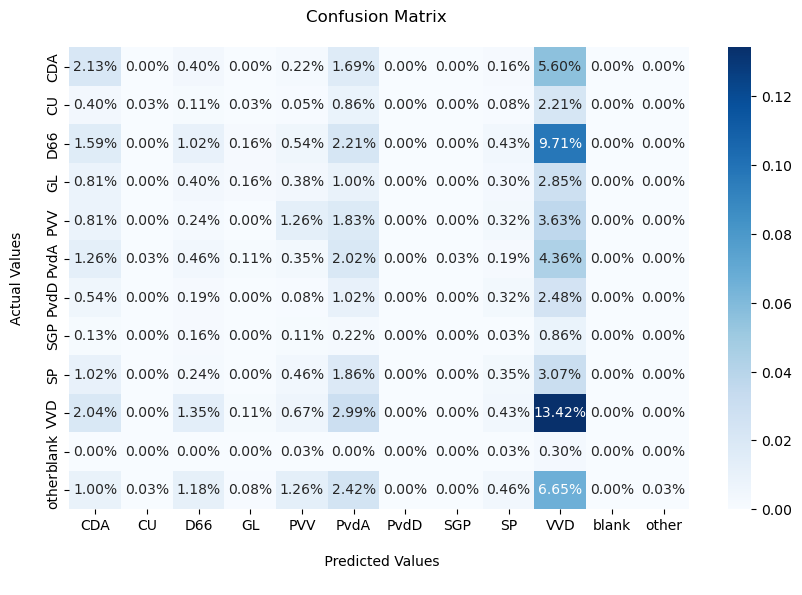

In [31]:
plot_confusion(y_test_ind, pred_ind_rf)

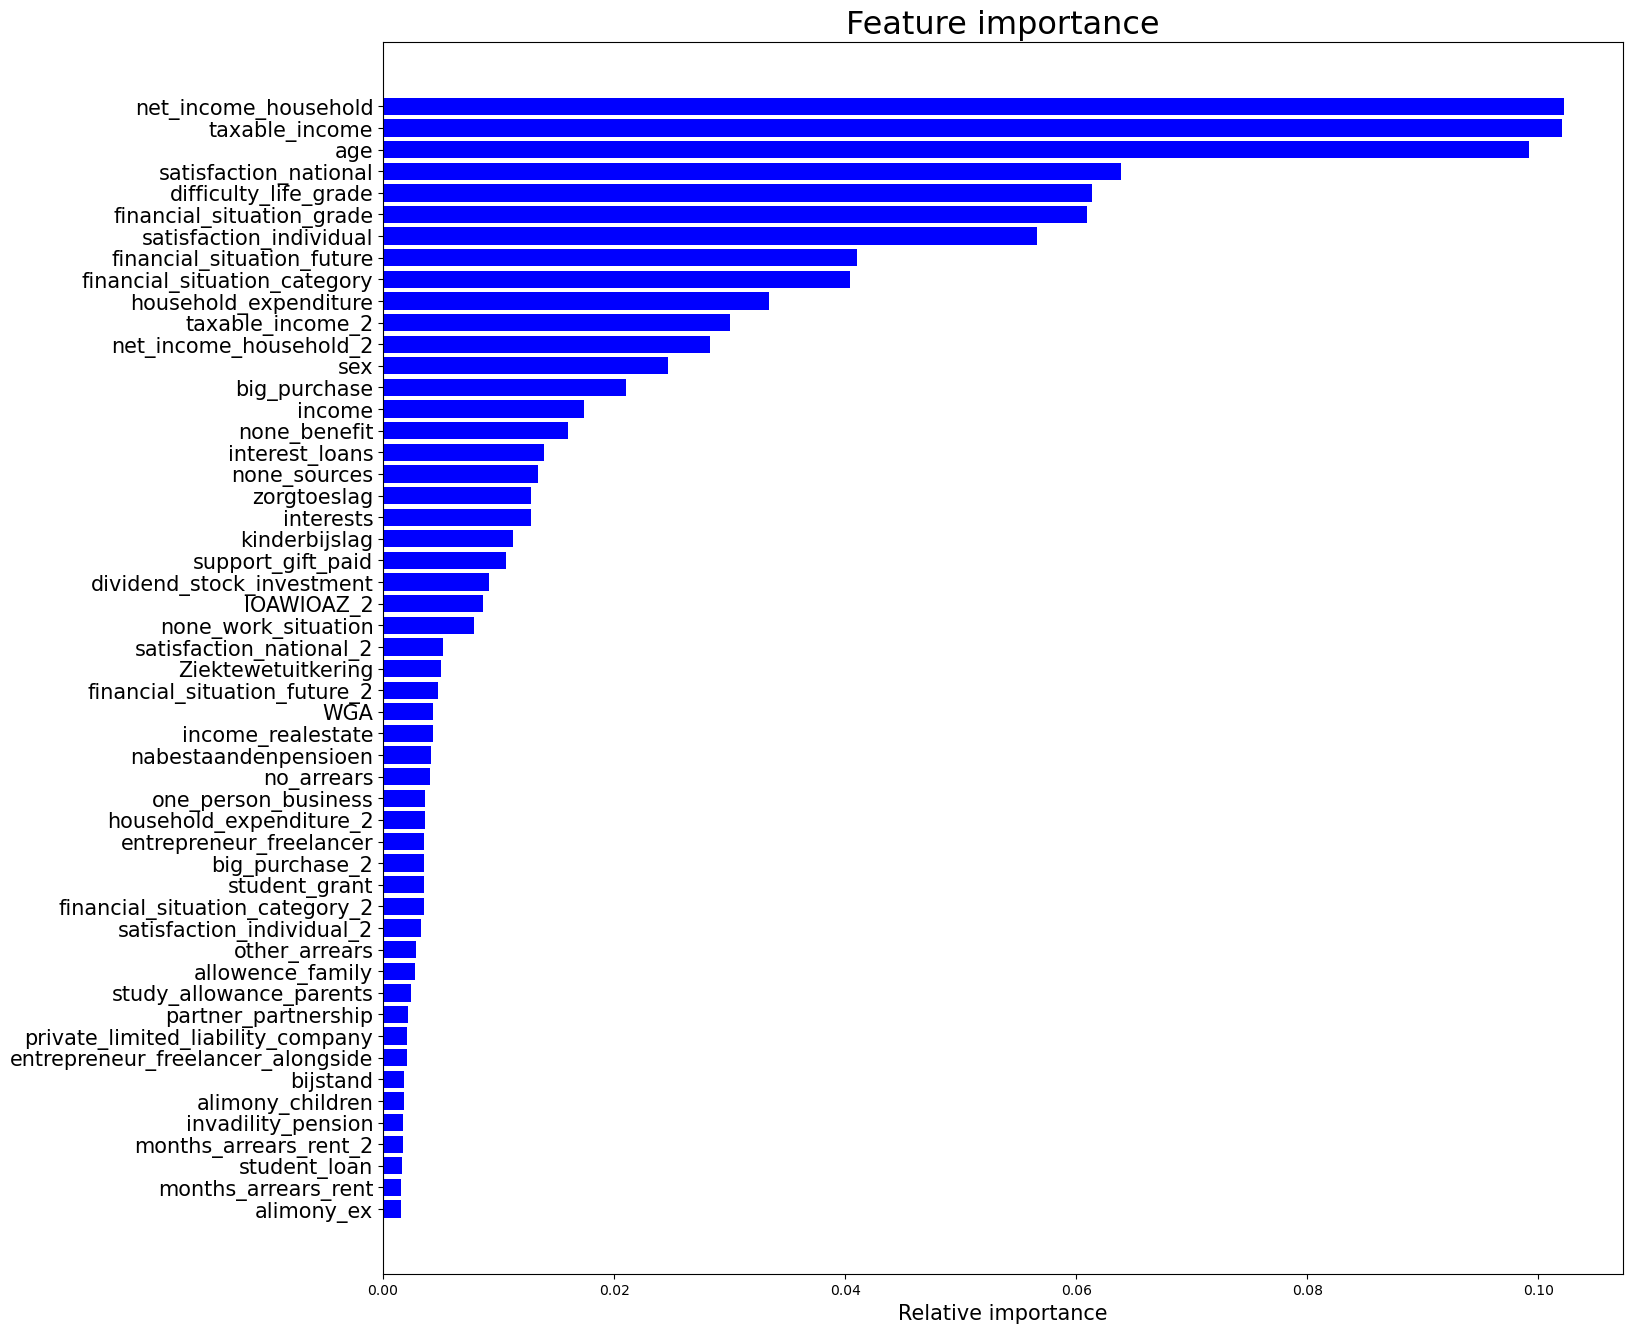

In [32]:
plot_feature_importance(train_set_ind, rf_clf_ind, 52)

&nbsp;

&nbsp;

_valence-level_

In [33]:
rf_clf_val = RandomForestClassifier(n_estimators=150, max_features='log2')

rf_clf_val.fit(X_train_val,y_train_val) 

pred_val = rf_clf_val.predict(X_test_val) 

In [34]:
print(classification_report(y_test_val, pred_val, zero_division=1)) 

              precision    recall  f1-score   support

         CDA       0.25      0.05      0.08       379
          CU       0.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       0.00      0.00      0.00       219
         PVV       0.30      0.09      0.13       301
        PvdA       0.19      0.77      0.31       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.16      0.07      0.09       260
         VVD       0.41      0.97      0.58       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.01       487

    accuracy                           0.29      3717
   macro avg       0.44      0.16      0.10      3717
weighted avg       0.36      0.29      0.18      3717



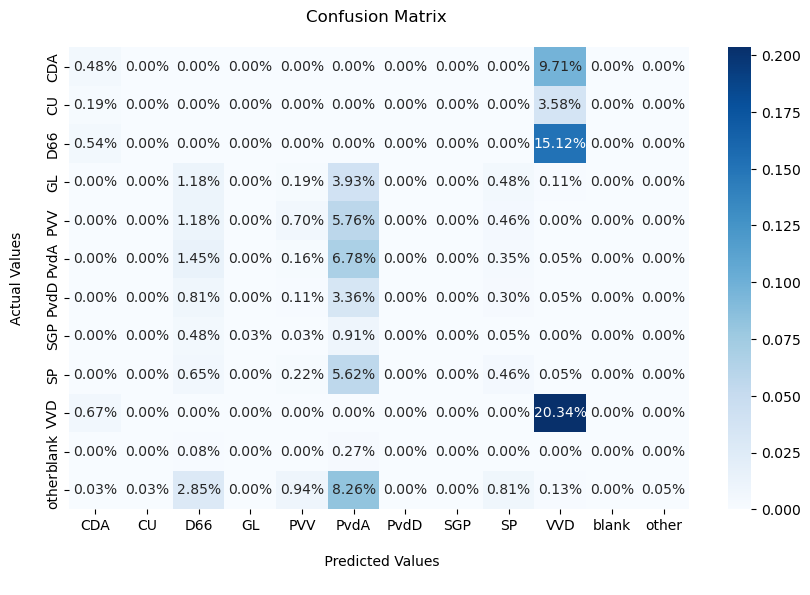

In [35]:
plot_confusion(y_test_val, pred_val)

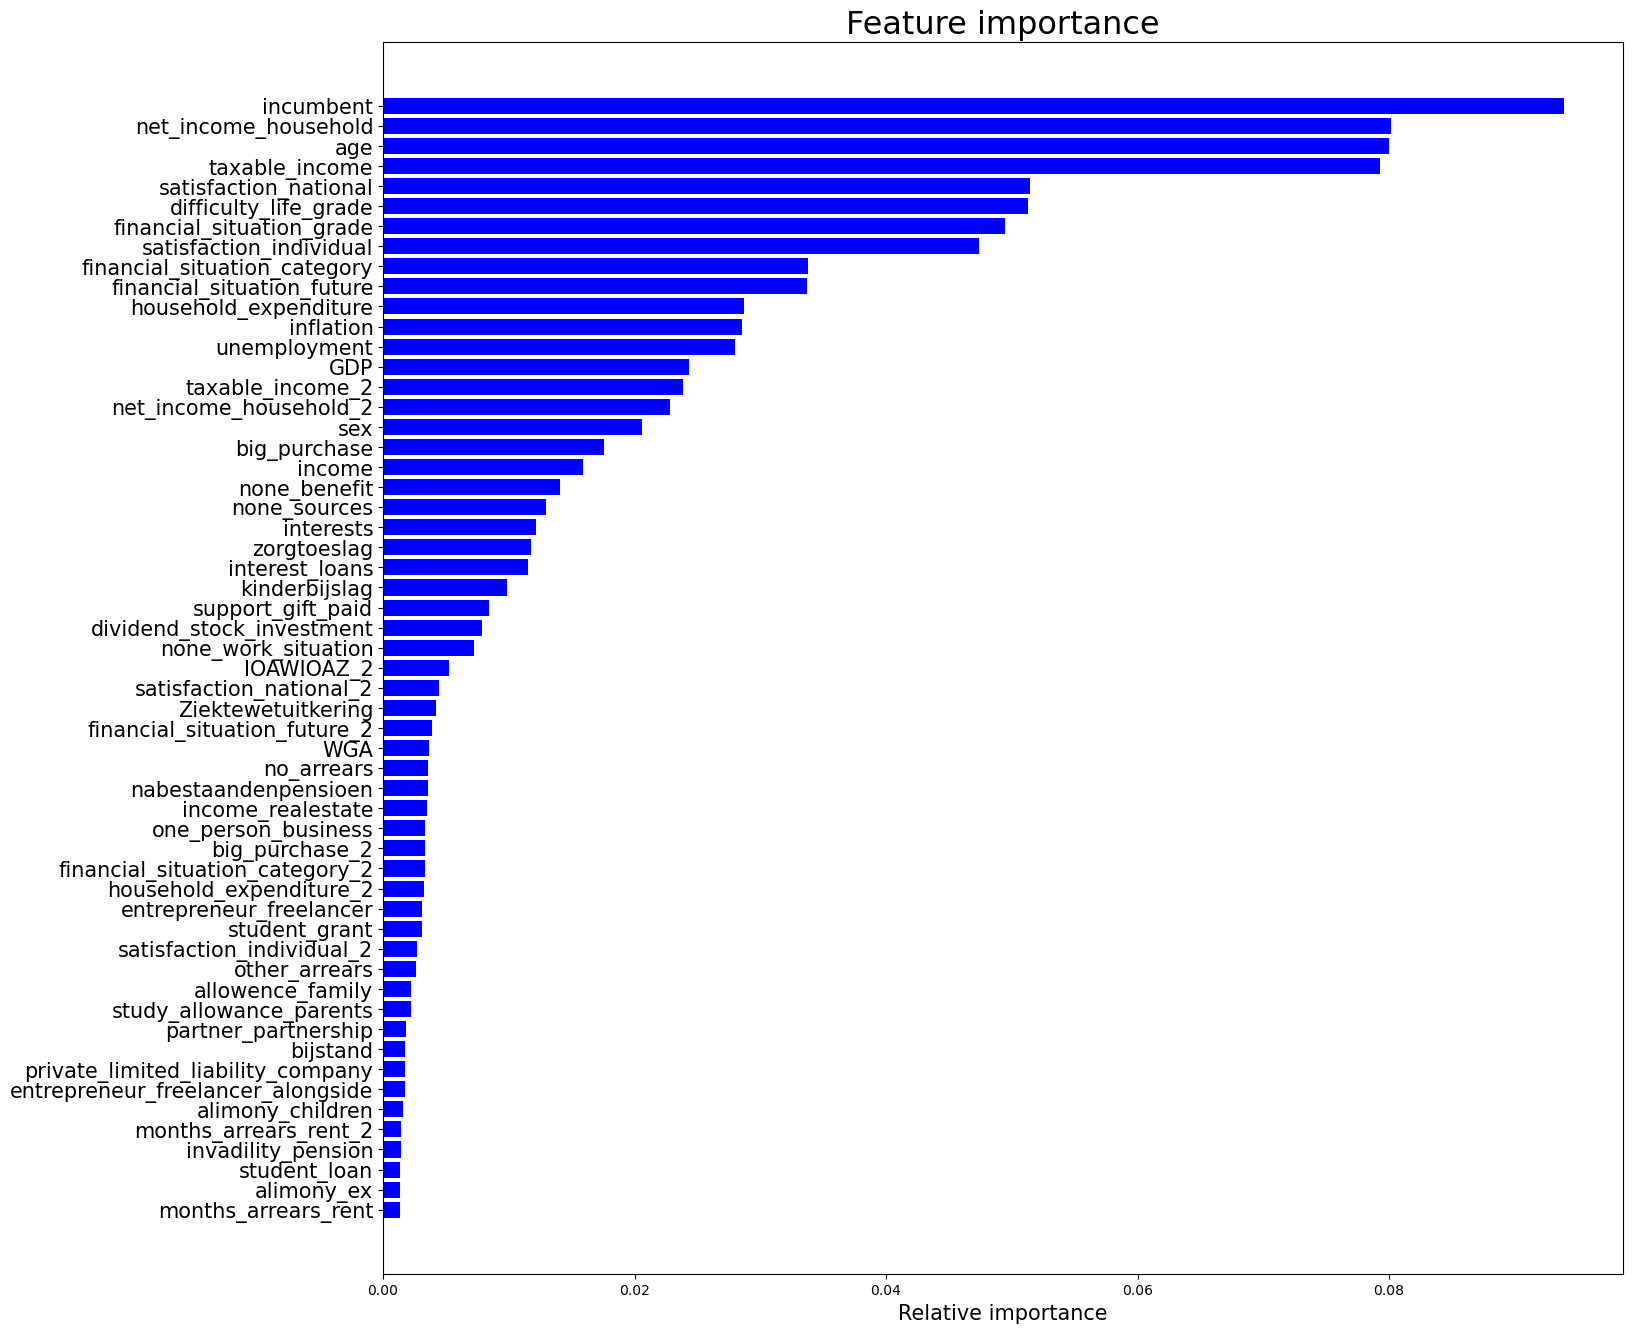

In [36]:
plot_feature_importance(train_set_val, rf_clf_val, 56)

&nbsp;

&nbsp;

__precision scores__

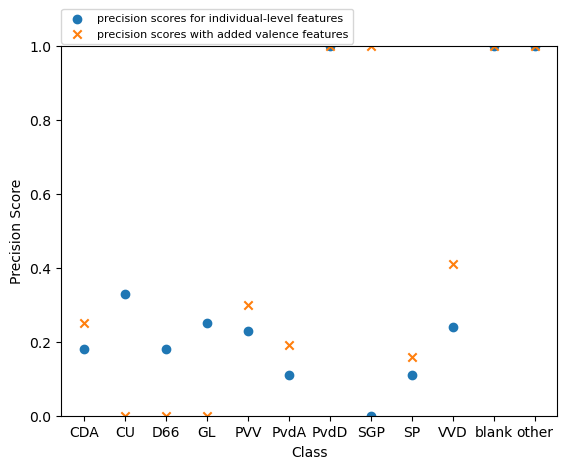

In [102]:
precision_ind = [0.18,0.33,0.18,0.25,0.23,0.11,1,0,0.11,0.24,1,1]
precision_val = [0.25,0,0,0,0.3,0.19,1,1,0.16,0.41,1,1]

plt.scatter(range(12), precision_ind, label='precision scores for individual-level features', marker='o')
plt.scatter(range(12), precision_val, label='precision scores with added valence features', marker='x')

plt.legend(fontsize=8, bbox_to_anchor=(0, 1,1,0.1), loc=2, borderaxespad=0.)

plt.xticks(range(12), ['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])

plt.xlabel('Class')
plt.ylabel('Precision Score')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.2, 0.2))

plt.show()

__recall scores__

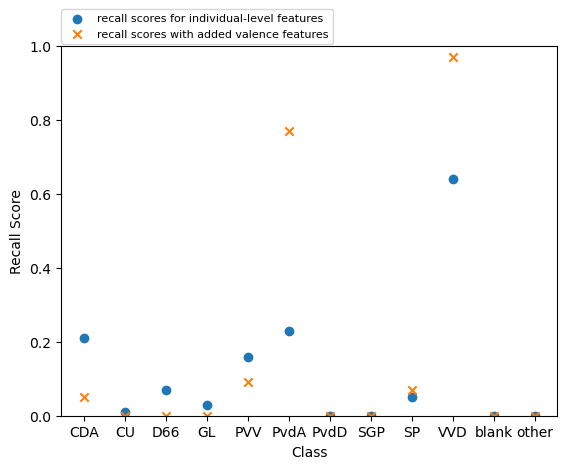

In [103]:
recall_ind = [0.21,0.01,0.07,0.03,0.16,0.23,0,0,0.05,0.64,0,0]
recall_val = [0.05,0,0,0,0.09,0.77,0,0,0.07,0.97,0,0]

plt.scatter(range(12), recall_ind, label='recall scores for individual-level features', marker='o')
plt.scatter(range(12), recall_val, label='recall scores with added valence features', marker='x')

plt.legend(fontsize=8, bbox_to_anchor=(0, 1,1,0.1), loc=2, borderaxespad=0.)

plt.xticks(range(12), ['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])

plt.xlabel('Class')
plt.ylabel('Recall Score')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.2, 0.2))

plt.show()

&nbsp;

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" answers:

__Individual__

In [39]:
np.random.seed(1908)
rf_clf_ind.fit(X_subset_013_ind,y_subset_013_ind)
pred_ind2 = rf_clf_ind.predict(X_test_ind)

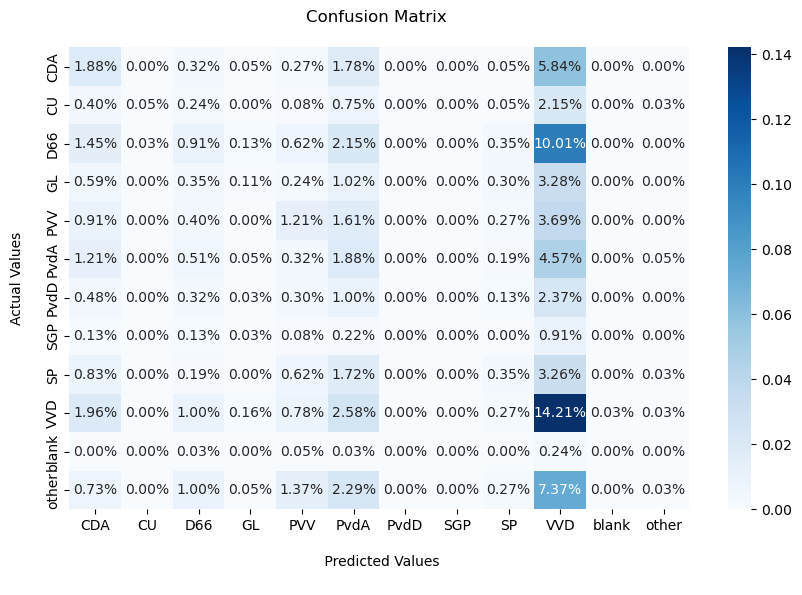

In [40]:
plot_confusion(y_test_ind, pred_ind2)

In [41]:
print(classification_report(y_test_ind, pred_ind2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.18      0.18      0.18       379
          CU       0.67      0.01      0.03       140
         D66       0.17      0.06      0.09       582
          GL       0.17      0.02      0.03       219
         PVV       0.20      0.15      0.17       301
        PvdA       0.11      0.21      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.16      0.05      0.08       260
         VVD       0.25      0.68      0.36       781
       blank       0.00      0.00      0.00        13
       other       0.17      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.34      0.11      0.09      3717
weighted avg       0.25      0.21      0.14      3717



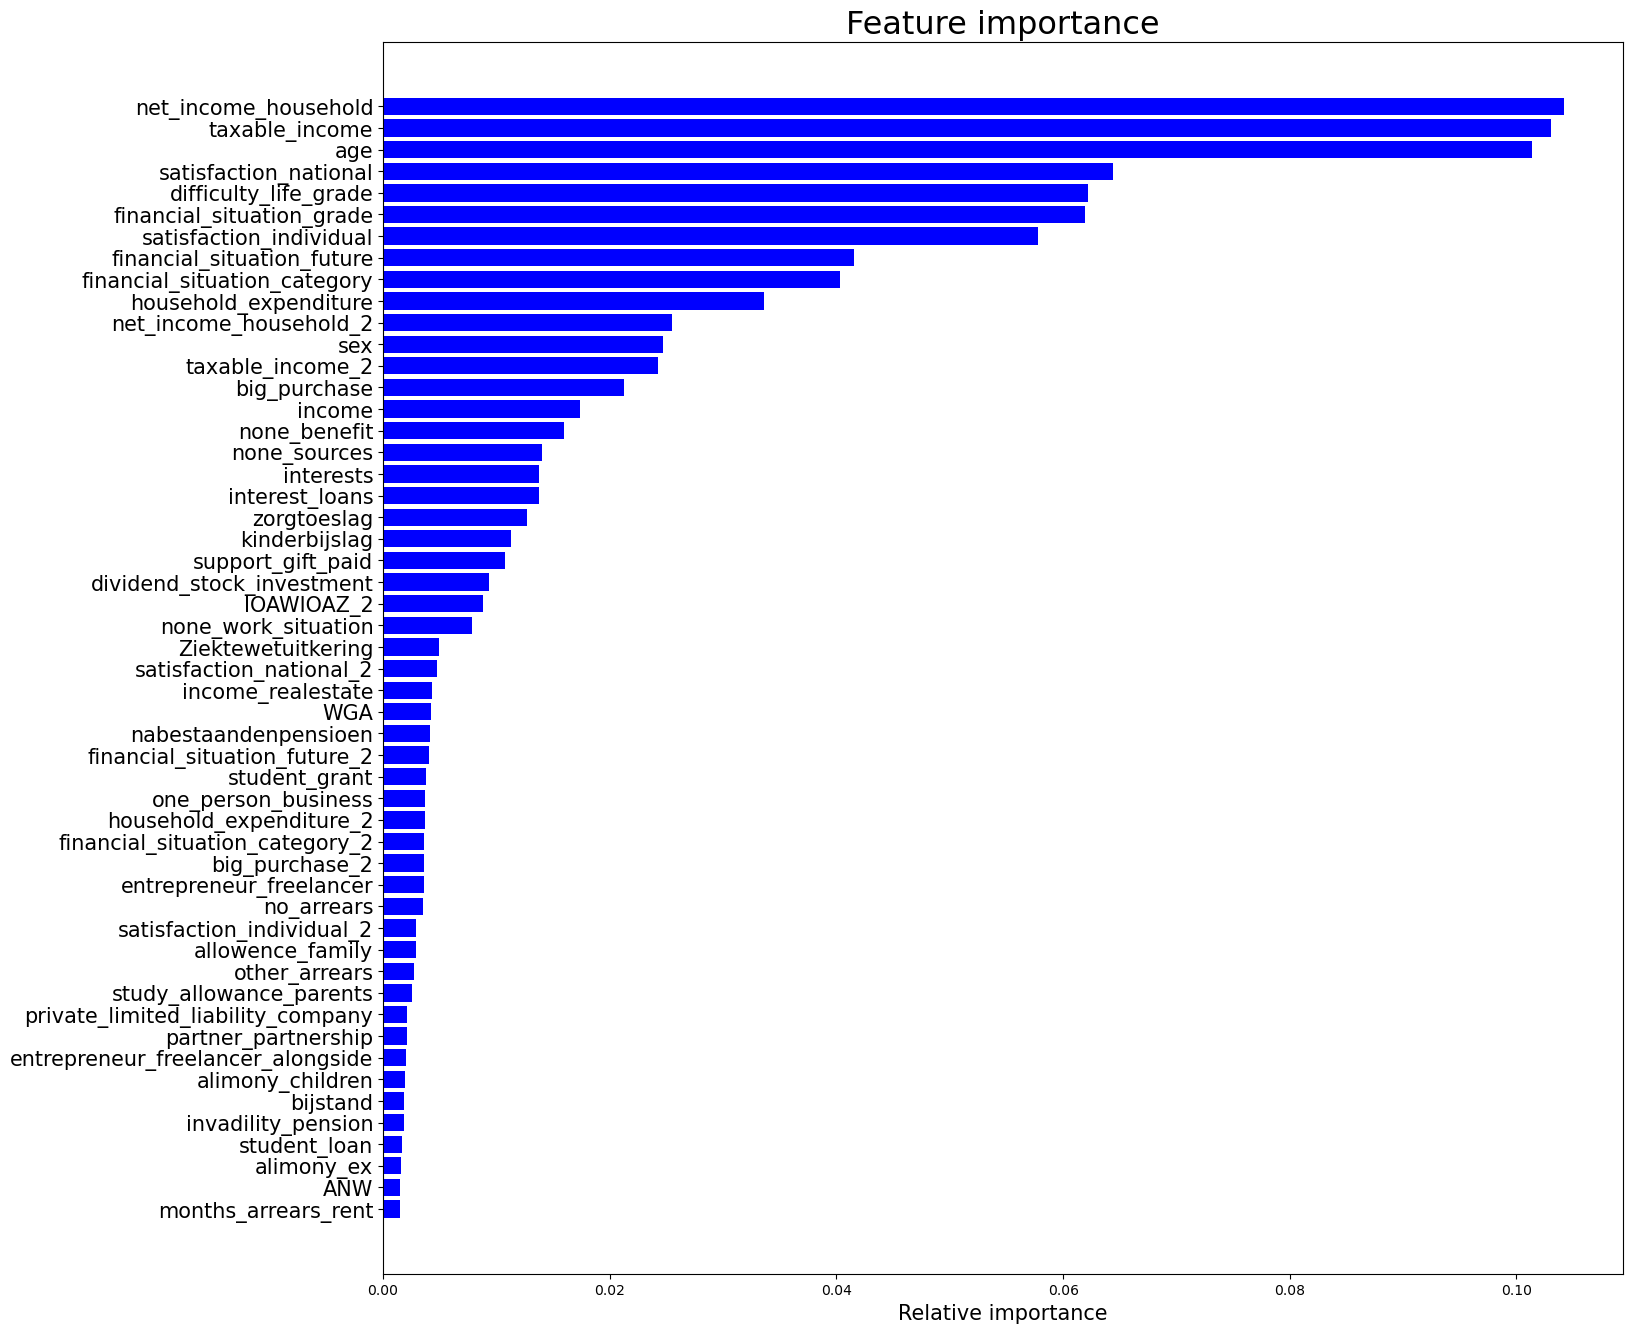

In [42]:
plot_feature_importance(subset_013_ind, rf_clf_ind, 52)

&nbsp;

__Valence__

In [43]:
np.random.seed(1909)
rf_clf_val.fit(X_subset_013_val,y_subset_013_val)
pred_val2 = rf_clf_val.predict(X_test_val)

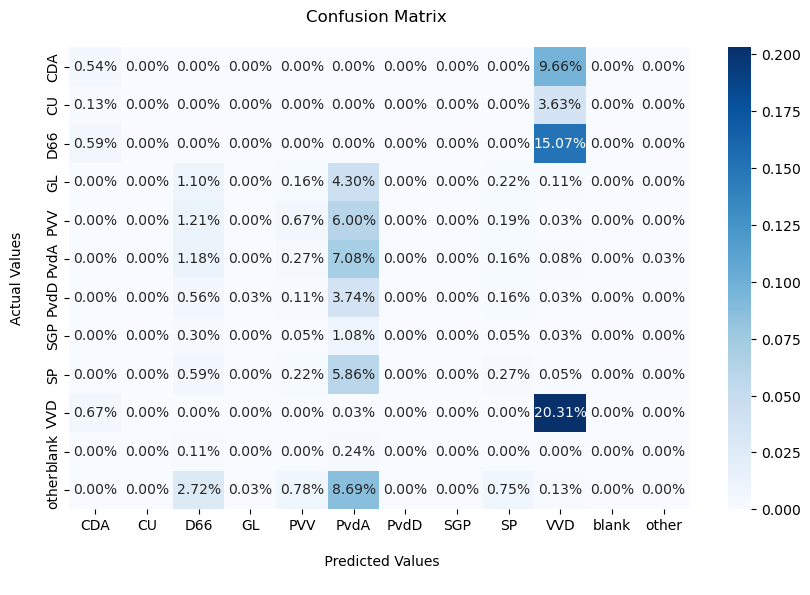

In [44]:
plot_confusion(y_test_val, pred_val2)

In [45]:
print(classification_report(y_test_val, pred_val2, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.28      0.05      0.09       379
          CU       1.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       0.00      0.00      0.00       219
         PVV       0.30      0.08      0.13       301
        PvdA       0.19      0.80      0.31       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.15      0.04      0.06       260
         VVD       0.41      0.97      0.58       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.29      3717
   macro avg       0.44      0.16      0.10      3717
weighted avg       0.27      0.29      0.17      3717



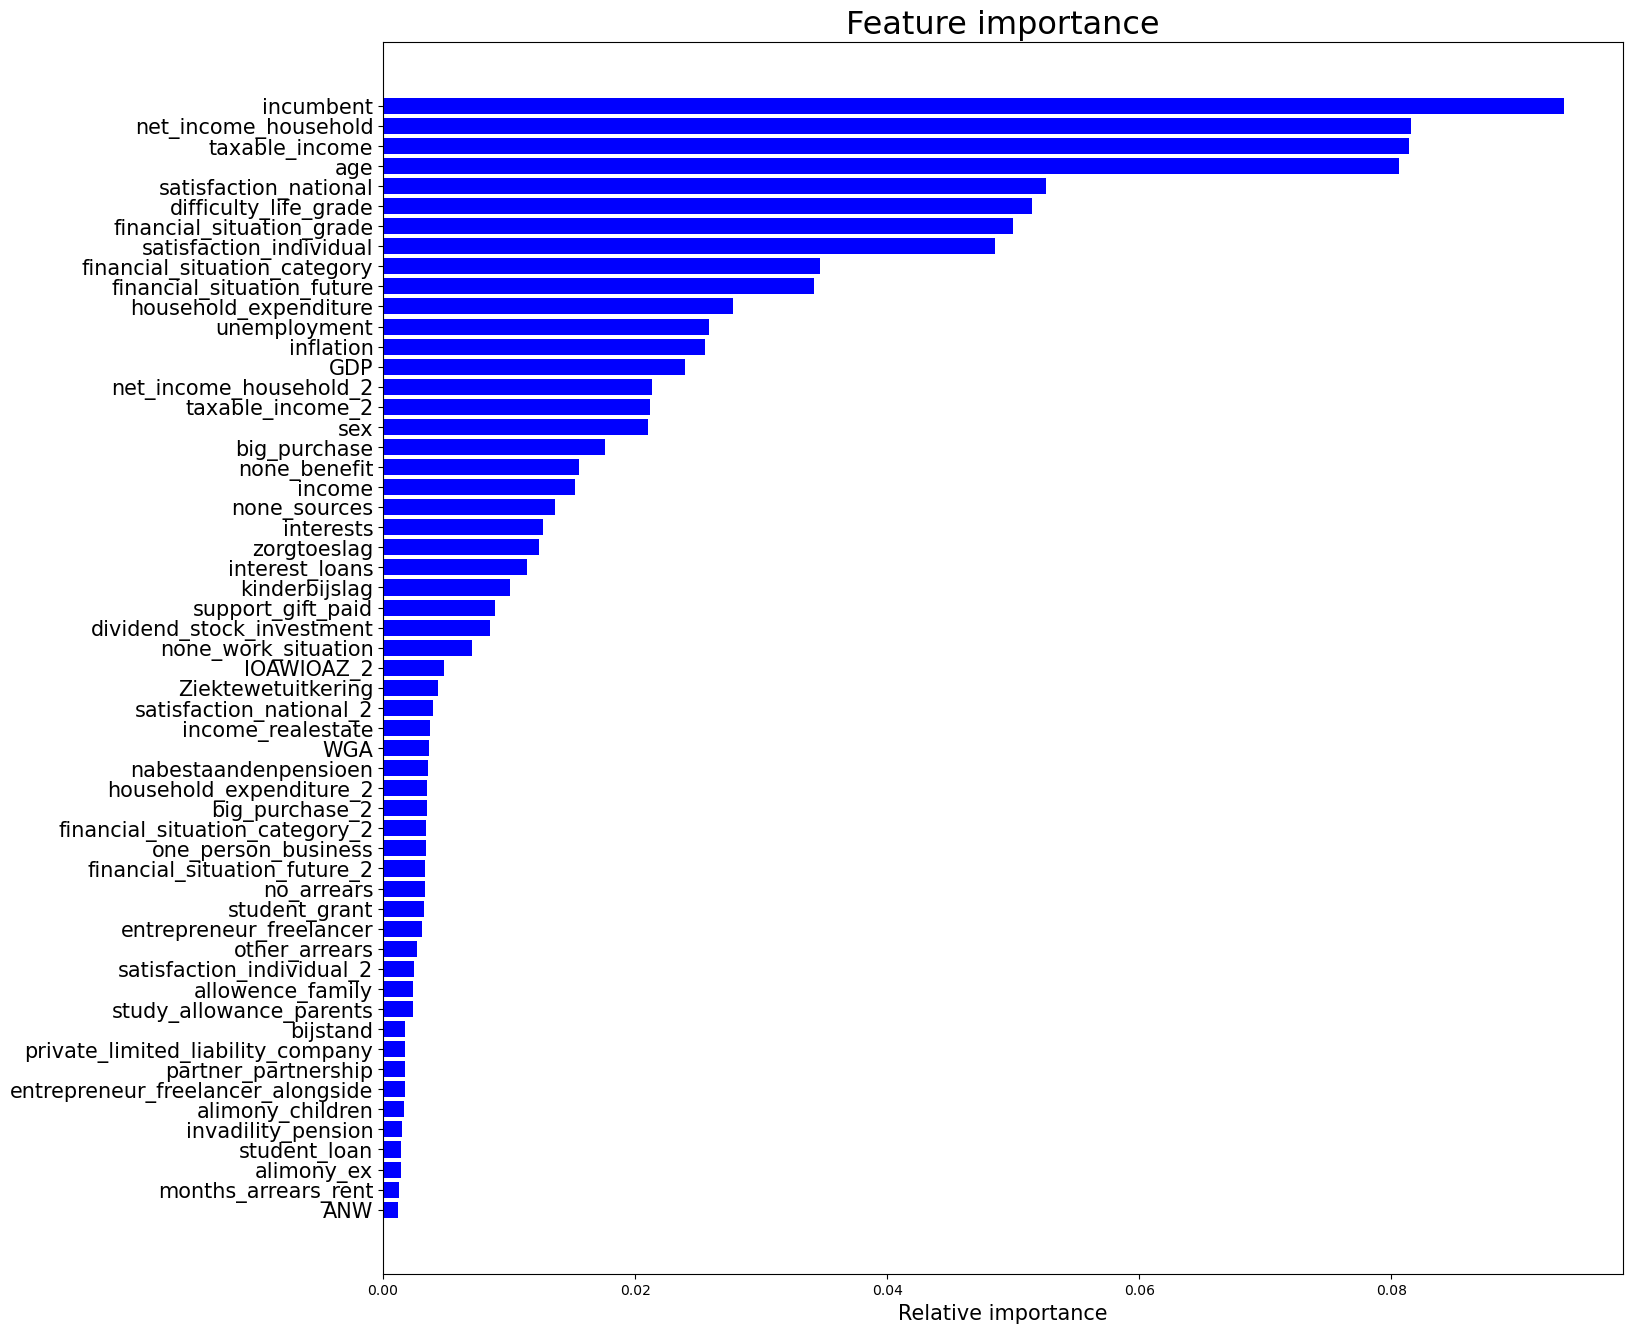

In [46]:
plot_feature_importance(subset_013_val, rf_clf_val, 56)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" & "I don't know" answers:

__Individual__

In [47]:
np.random.seed(1908)
rf_clf_ind.fit(X_subset_03_ind,y_subset_03_ind)
pred_ind3 = rf_clf_ind.predict(X_test_ind)

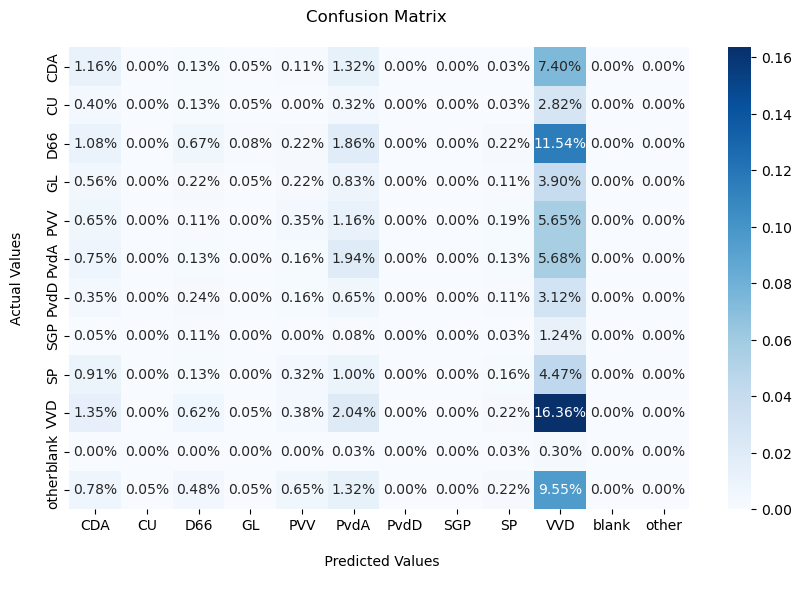

In [48]:
plot_confusion(y_test_ind, pred_ind3)

In [49]:
print(classification_report(y_test_ind, pred_ind3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.14      0.11      0.13       379
          CU       0.00      0.00      0.00       140
         D66       0.23      0.04      0.07       582
          GL       0.15      0.01      0.02       219
         PVV       0.14      0.04      0.07       301
        PvdA       0.15      0.22      0.18       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.11      0.02      0.04       260
         VVD       0.23      0.78      0.35       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.21      3717
   macro avg       0.43      0.10      0.07      3717
weighted avg       0.34      0.21      0.12      3717



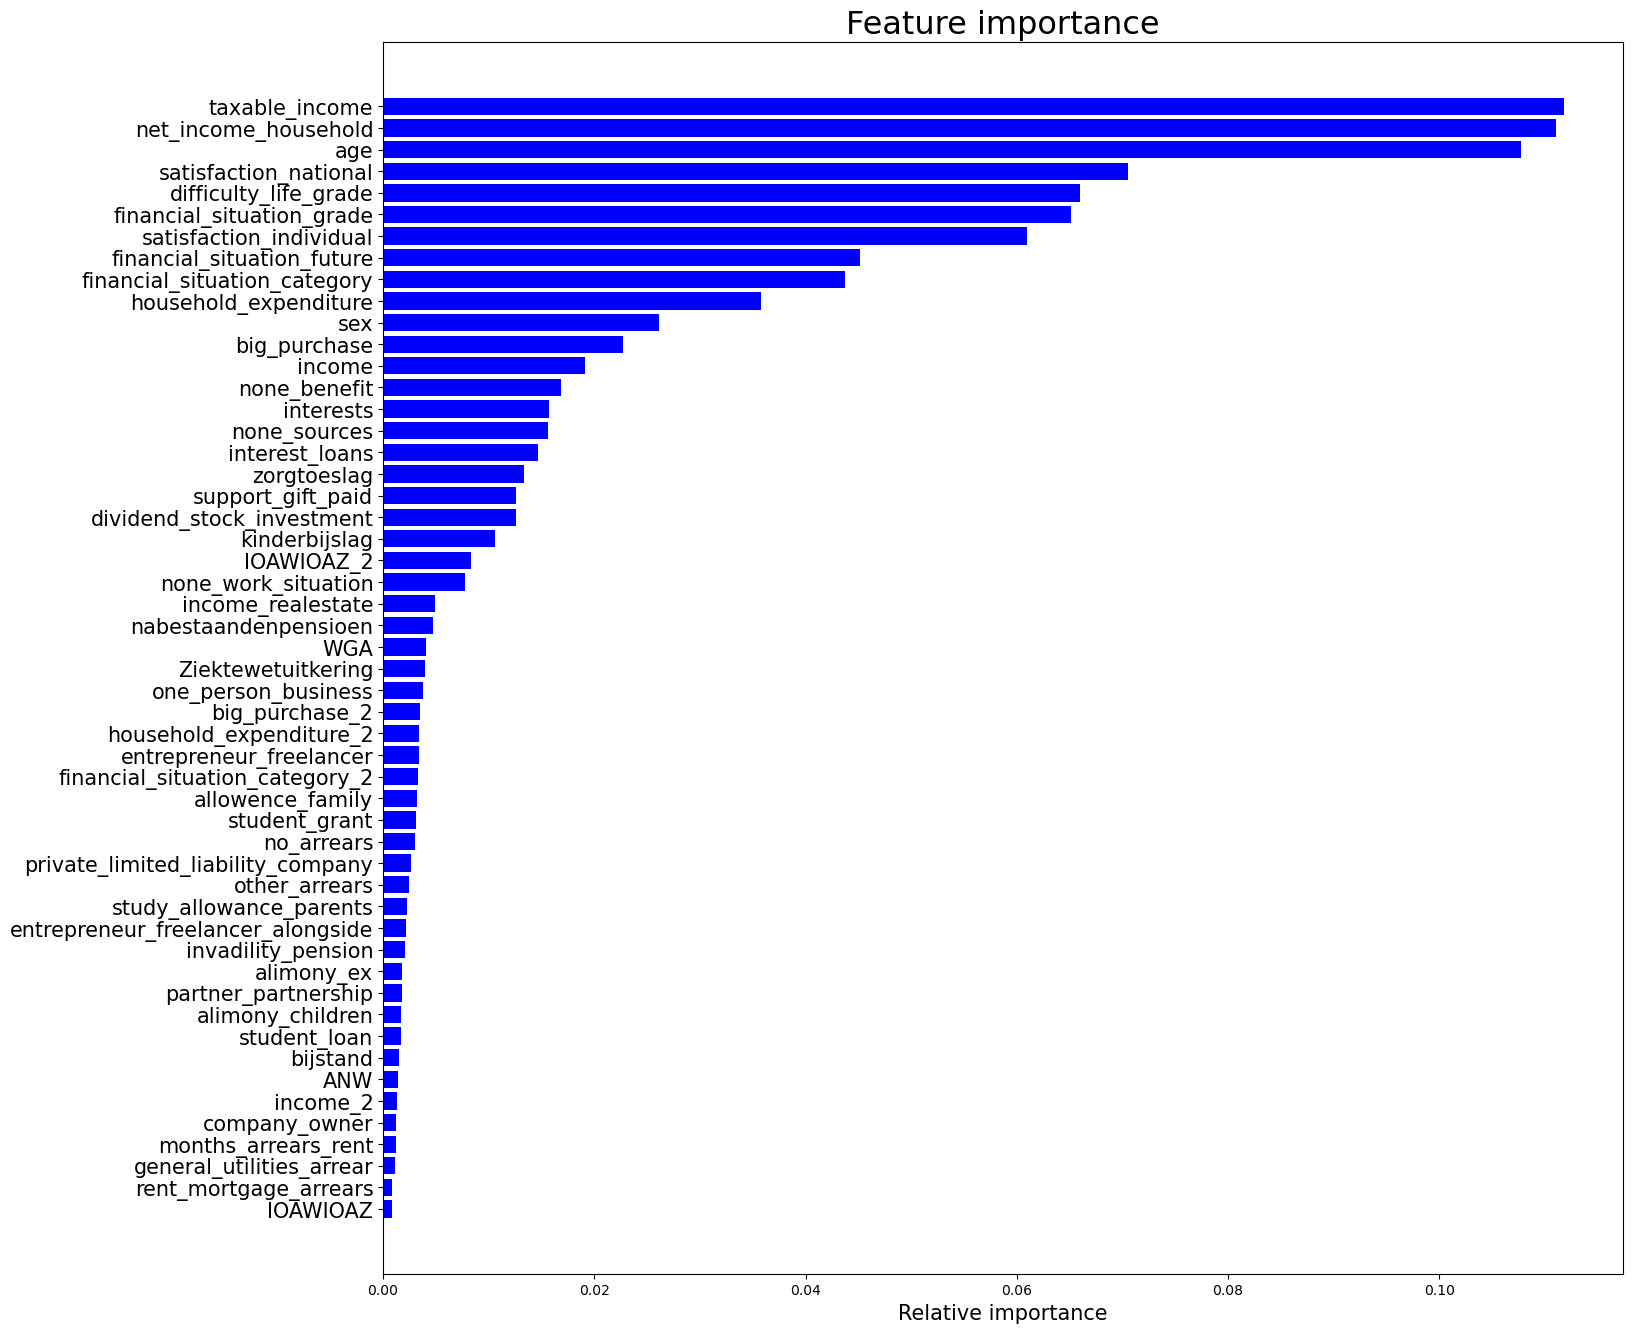

In [50]:
plot_feature_importance(subset_03_ind, rf_clf_ind, 52)

&nbsp;

__Valence__

In [51]:
np.random.seed(1909)
rf_clf_val.fit(X_subset_03_val,y_subset_03_val)
pred_val3 = rf_clf_val.predict(X_test_val)

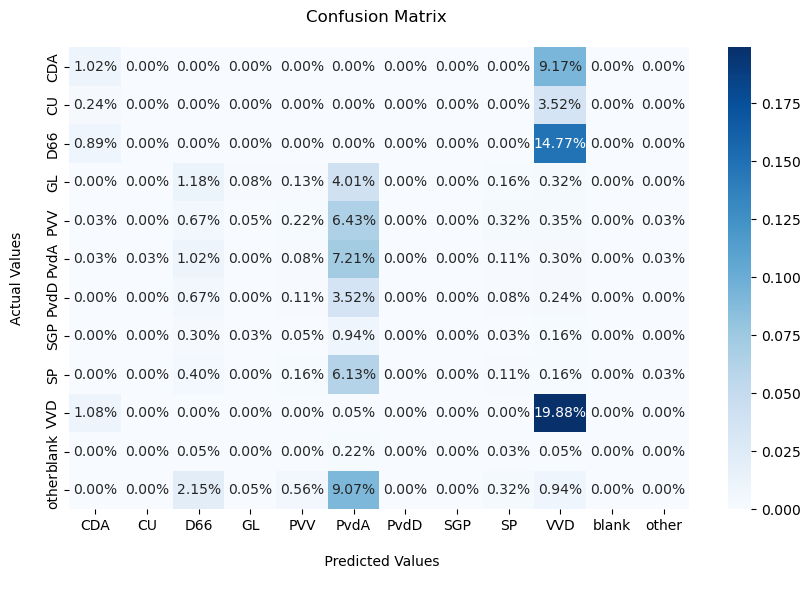

In [52]:
plot_confusion(y_test_val, pred_val3)

In [53]:
print(classification_report(y_test_val, pred_val3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.31      0.10      0.15       379
          CU       0.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       0.38      0.01      0.03       219
         PVV       0.16      0.03      0.05       301
        PvdA       0.19      0.82      0.31       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.09      0.02      0.03       260
         VVD       0.40      0.95      0.56       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.29      3717
   macro avg       0.38      0.16      0.09      3717
weighted avg       0.24      0.29      0.17      3717



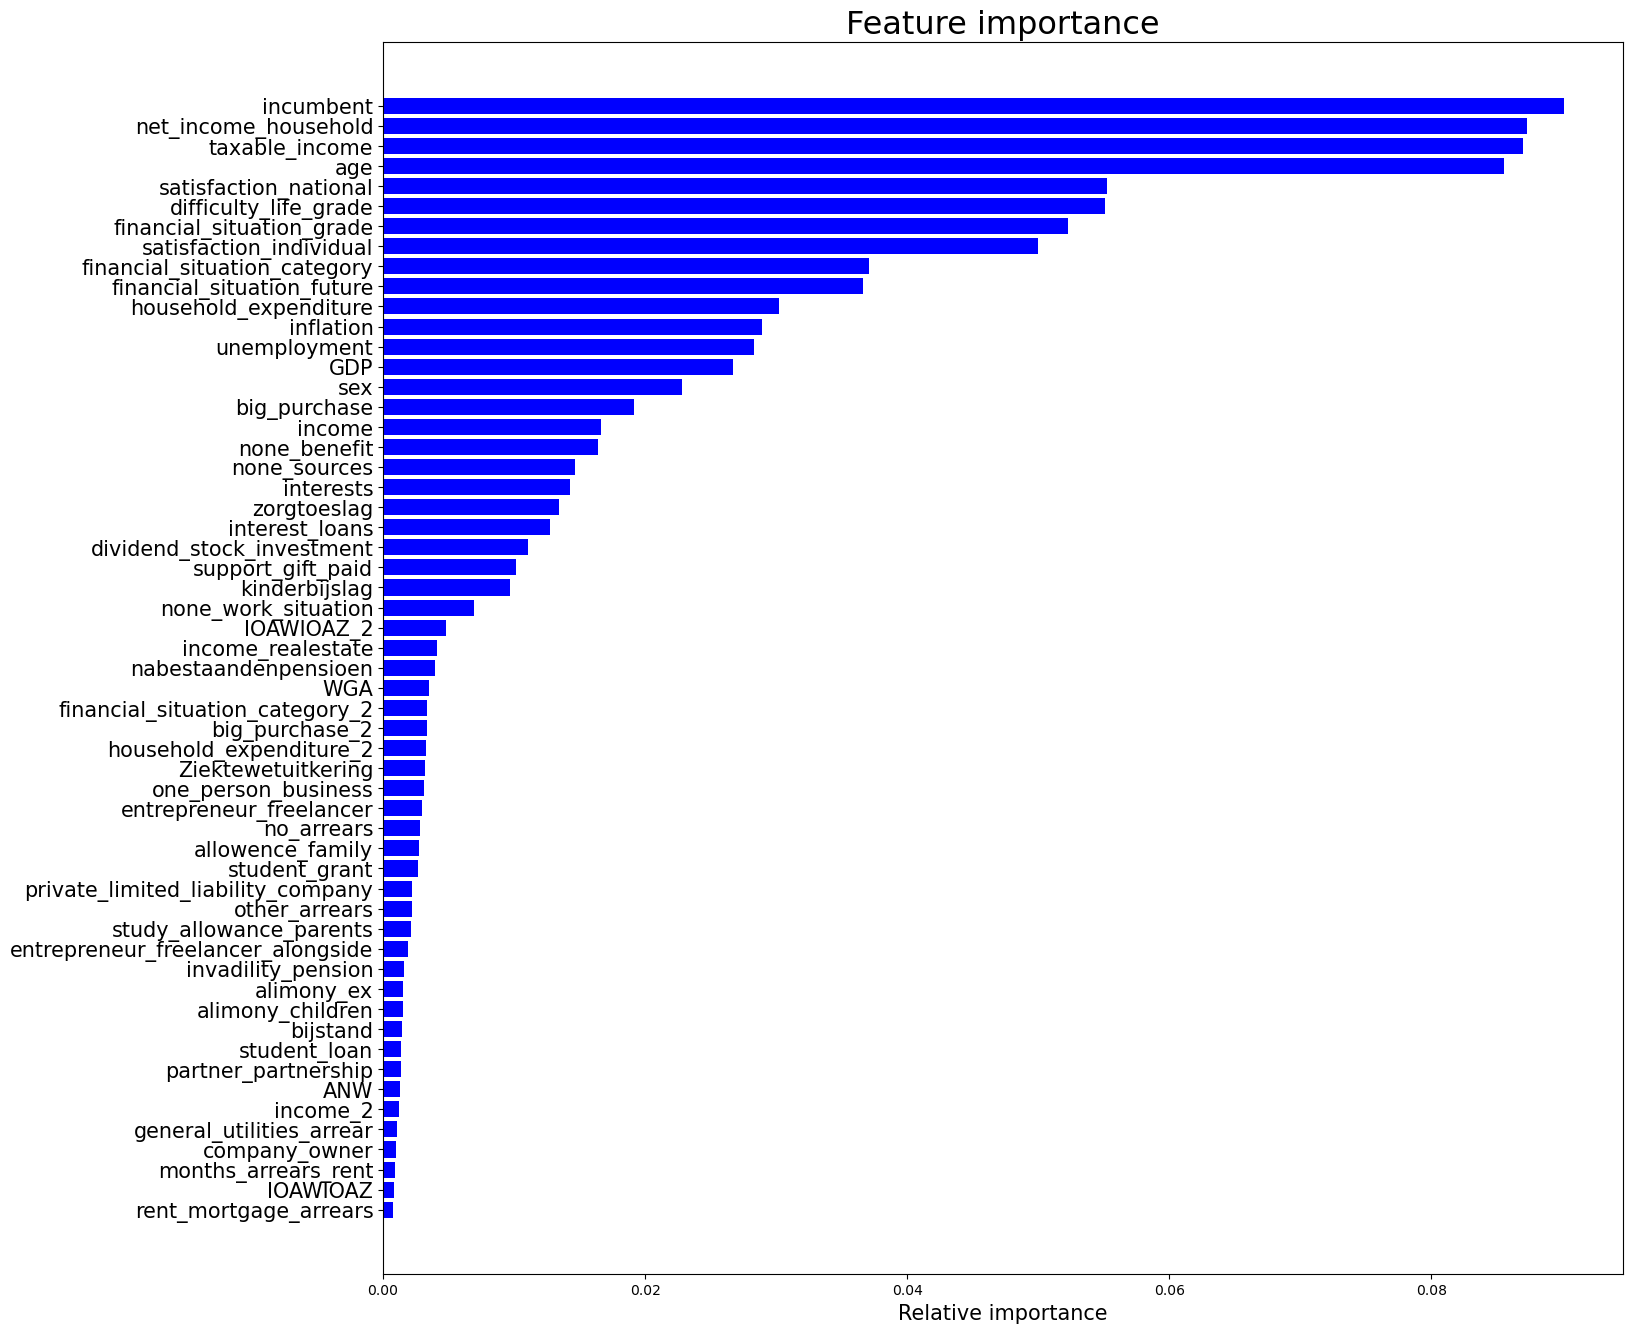

In [54]:
plot_feature_importance(subset_03_val, rf_clf_val, 56)

&nbsp;

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say", "I don't know" & NaN answers:

__Individual__

In [55]:
np.random.seed(1908)
rf_clf_ind.fit(X_subset_3_ind,y_subset_3_ind)
pred_ind4 = rf_clf_ind.predict(X_test_ind)

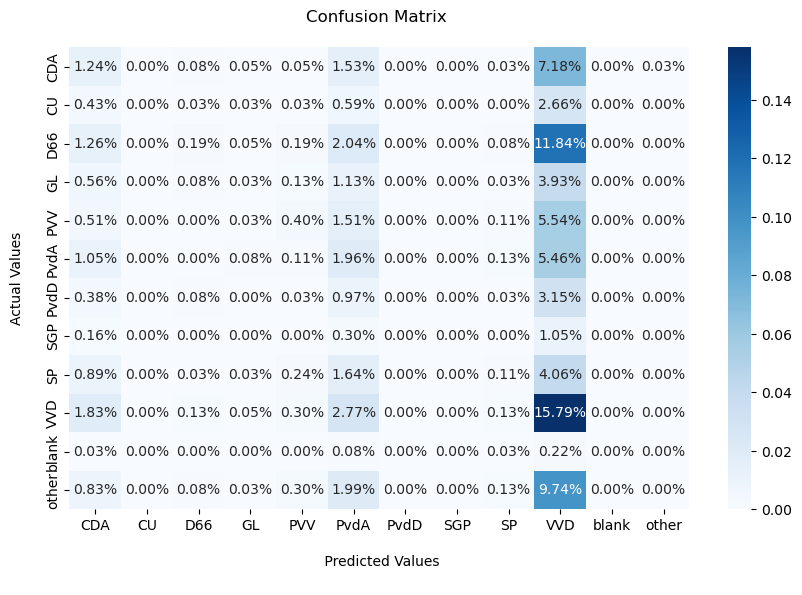

In [56]:
plot_confusion(y_test_ind, pred_ind4)

In [57]:
print(classification_report(y_test_ind, pred_ind4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.13      0.12      0.13       379
          CU       1.00      0.00      0.00       140
         D66       0.27      0.01      0.02       582
          GL       0.07      0.00      0.01       219
         PVV       0.23      0.05      0.08       301
        PvdA       0.12      0.22      0.16       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.13      0.02      0.03       260
         VVD       0.22      0.75      0.34       781
       blank       1.00      0.00      0.00        13
       other       0.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.43      0.10      0.06      3717
weighted avg       0.25      0.20      0.11      3717



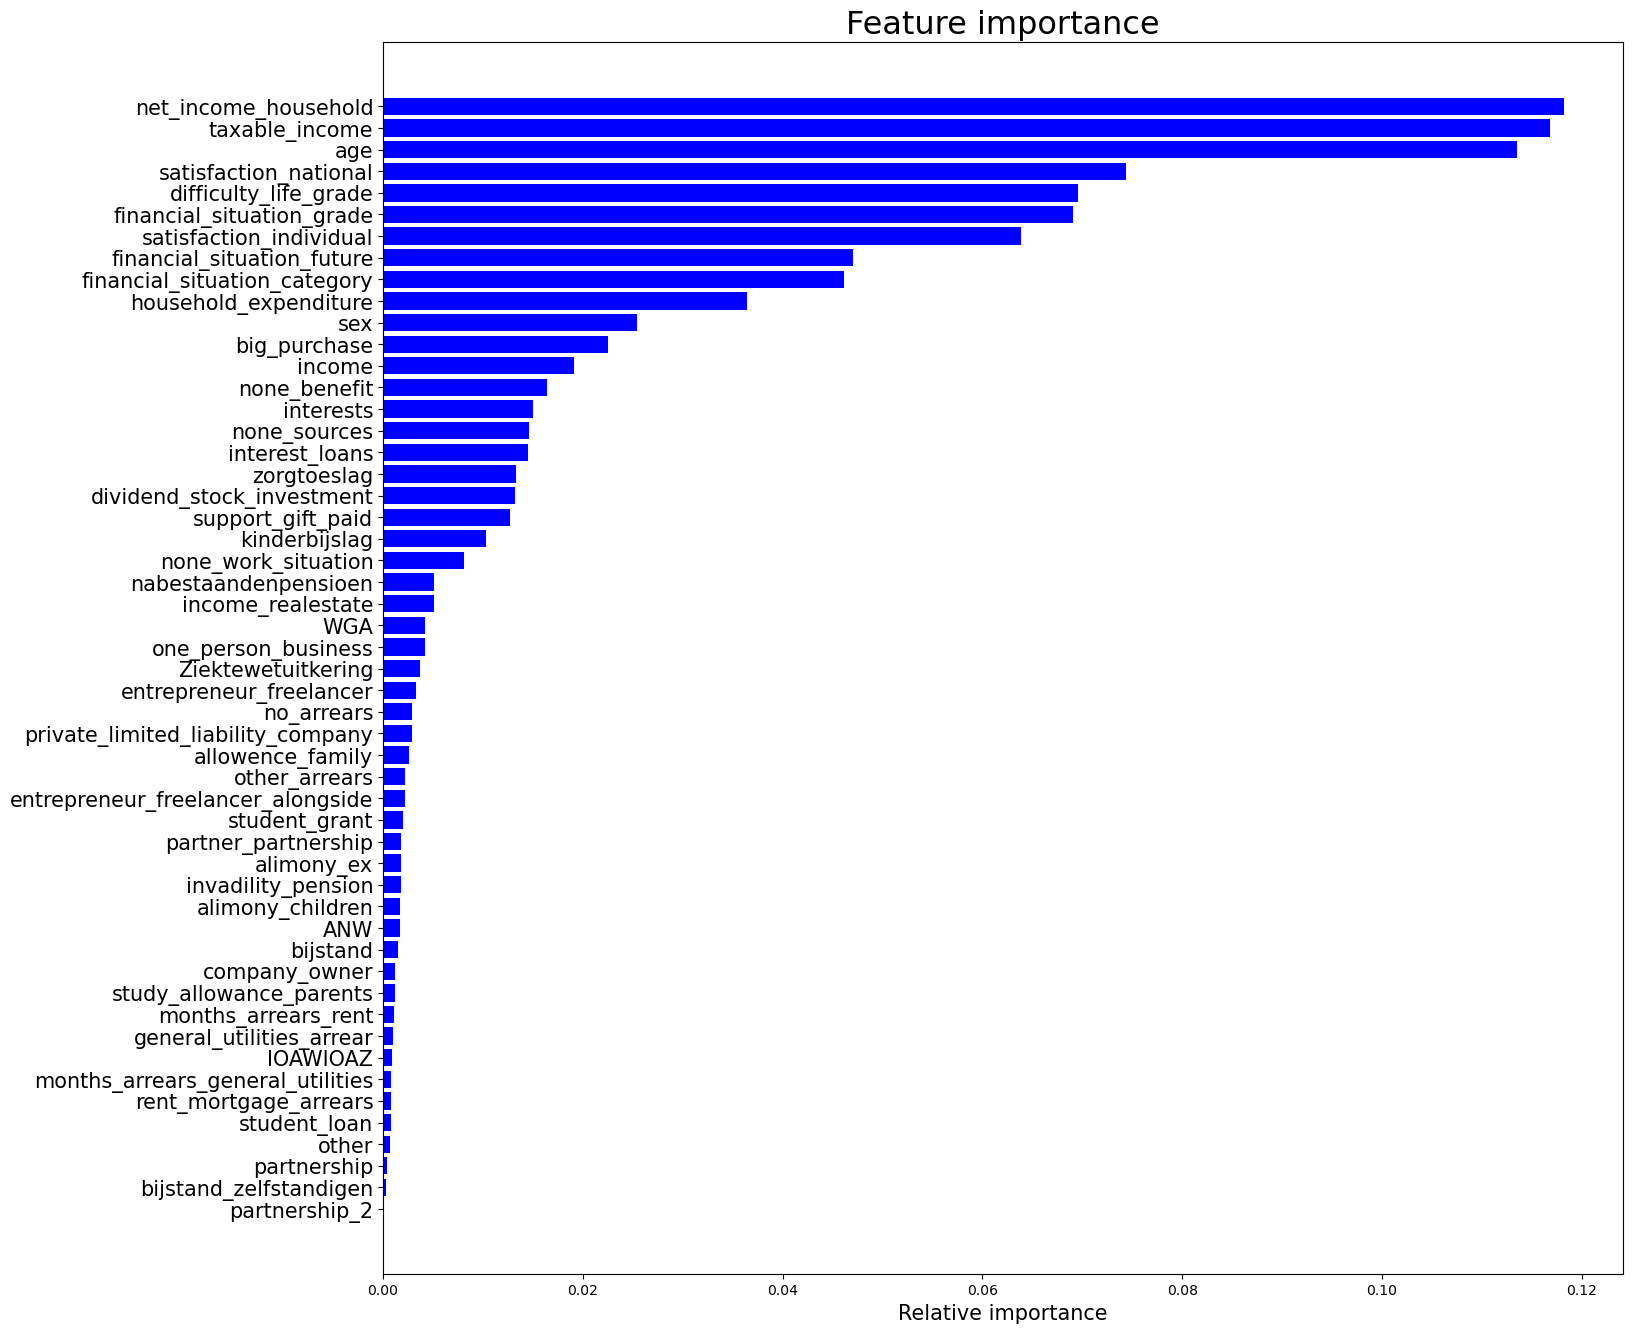

In [58]:
plot_feature_importance(subset_3_ind, rf_clf_ind, 52)

&nbsp;

__Valence__

In [59]:
np.random.seed(1909)
rf_clf_val.fit(X_subset_3_val,y_subset_3_val)
pred_val4 = rf_clf_val.predict(X_test_val)

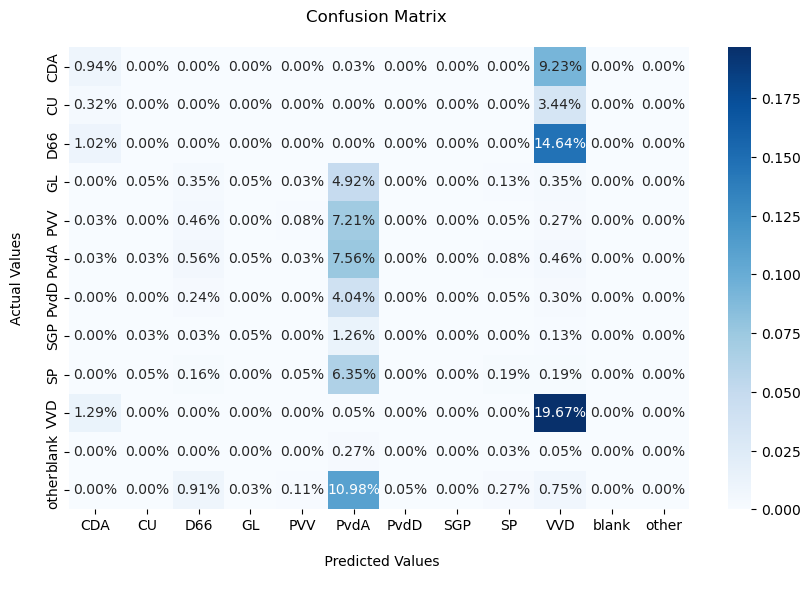

In [60]:
plot_confusion(y_test_val, pred_val4)

In [61]:
print(classification_report(y_test_val, pred_val4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.26      0.09      0.14       379
          CU       0.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       0.29      0.01      0.02       219
         PVV       0.27      0.01      0.02       301
        PvdA       0.18      0.86      0.29       327
        PvdD       0.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.23      0.03      0.05       260
         VVD       0.40      0.94      0.56       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.28      3717
   macro avg       0.39      0.16      0.09      3717
weighted avg       0.33      0.28      0.16      3717



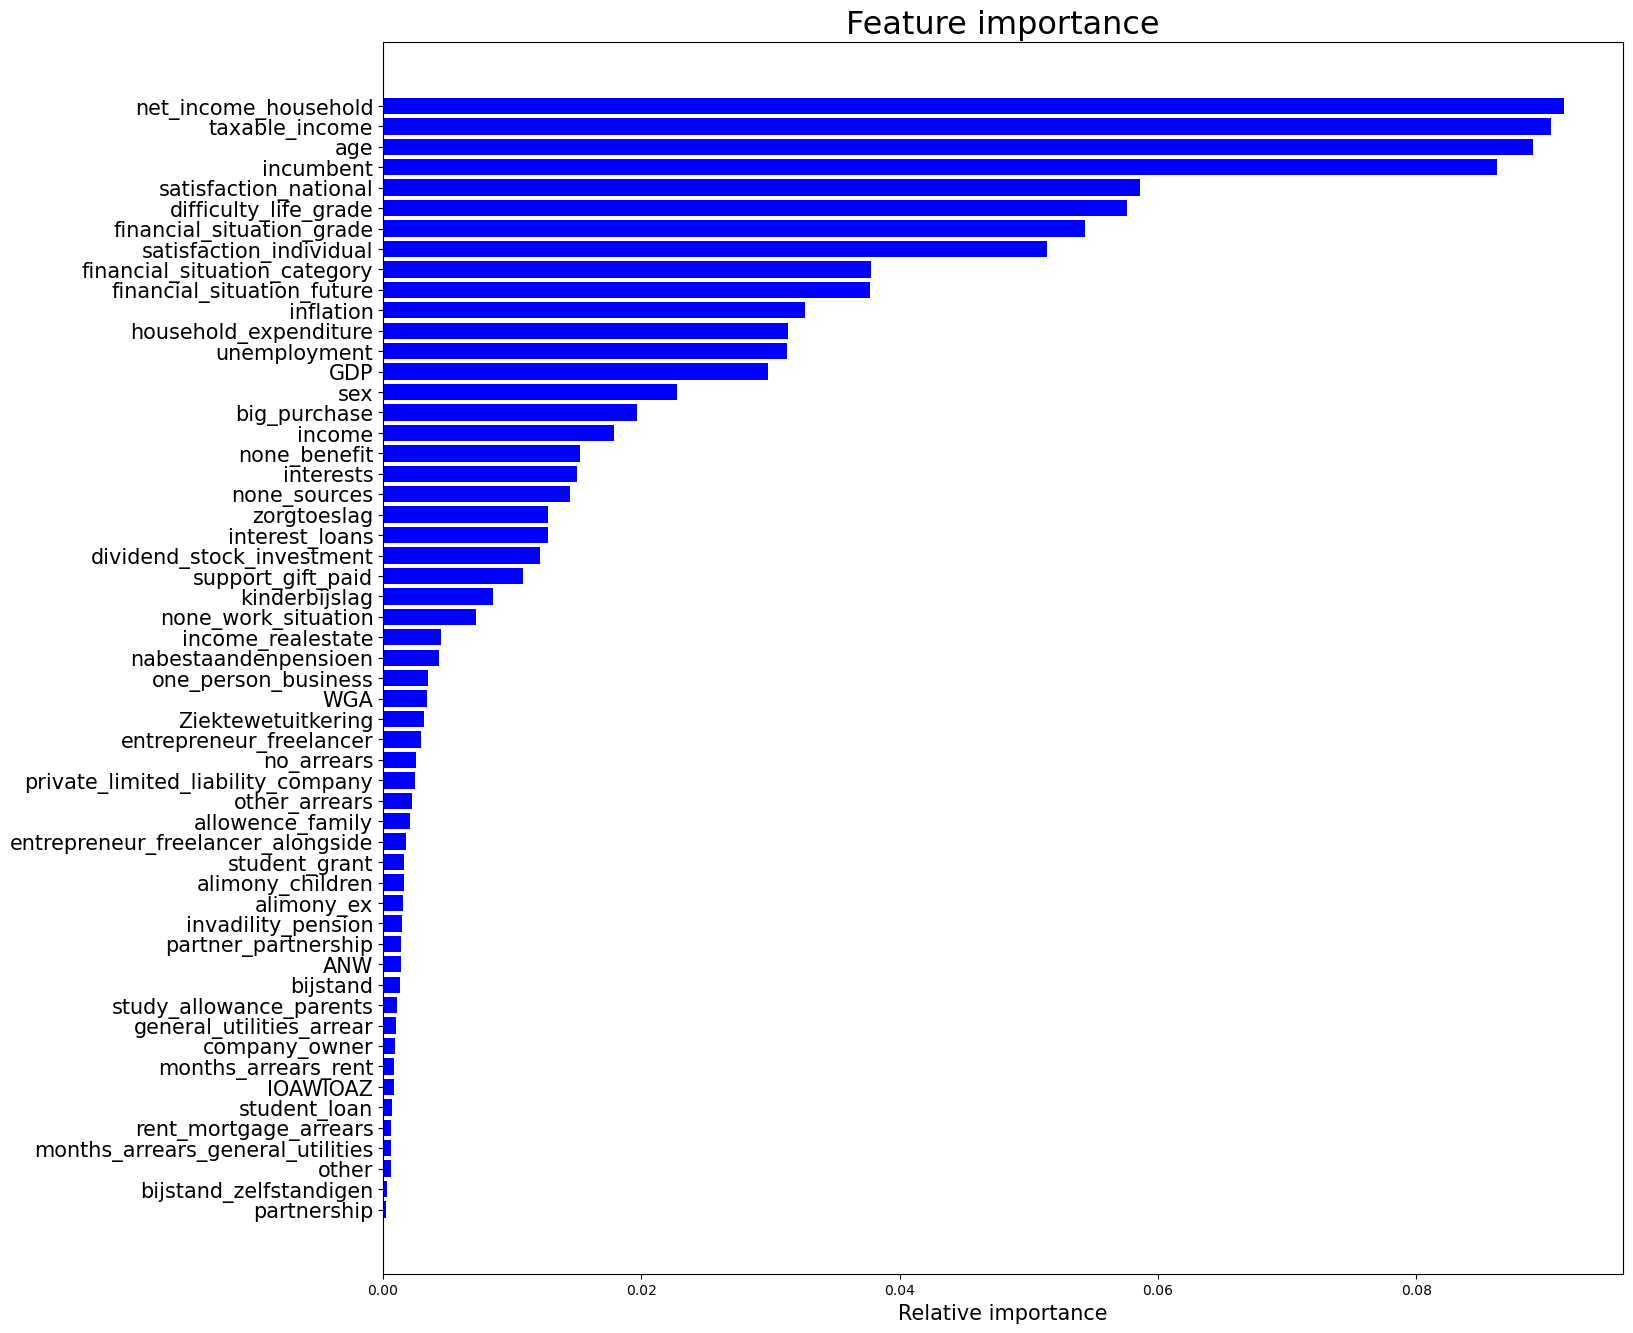

In [62]:
plot_feature_importance(subset_3_val, rf_clf_val, 55)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# XGBoost

In [63]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
test_set_ind = pd.read_csv("../Downloads/test_set_ind.csv")
train_set_val = pd.read_csv("../Downloads/train_set_val.csv")
test_set_val = pd.read_csv("../Downloads/test_set_val.csv")

subset_013_ind = pd.read_csv("../Downloads/subset1_ind.csv")
subset_03_ind = pd.read_csv("../Downloads/subset2_ind.csv")
subset_3_ind = pd.read_csv("../Downloads/subset3_ind.csv")
subset_013_val = pd.read_csv("../Downloads/subset1_val.csv")
subset_03_val = pd.read_csv("../Downloads/subset2_val.csv")
subset_3_val = pd.read_csv("../Downloads/subset3_val.csv")

In [64]:
train_set_ind = train_set_ind.drop(['Unnamed: 0'], axis=1)
test_set_ind = test_set_ind.drop(['Unnamed: 0', 'date'], axis=1)
train_set_val = train_set_val.drop(['Unnamed: 0', 'date'], axis=1)
test_set_val = test_set_val.drop(['Unnamed: 0', 'date'], axis=1)

subset_013_ind = subset_013_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_03_ind = subset_03_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_3_ind = subset_3_ind.drop(['Unnamed: 0', 'date'], axis=1)
subset_013_val = subset_013_val.drop(['Unnamed: 0', 'date'], axis=1)
subset_03_val = subset_03_val.drop(['Unnamed: 0', 'date'], axis=1)
subset_3_val = subset_3_val.drop(['Unnamed: 0', 'date'], axis=1)

&nbsp;

# Transform back to categorical

In [65]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [66]:
for col in train_set_ind.columns:
    for i in category_columns:
        if col == i:
            train_set_ind[col] = train_set_ind[col].astype('category')

In [67]:
for col in test_set_ind.columns:
    for i in category_columns:
        if col == i:
            test_set_ind[col] = test_set_ind[col].astype('category')

In [68]:
for col in train_set_val.columns:
    for i in category_columns:
        if col == i:
            train_set_val[col] = train_set_val[col].astype('category')

In [69]:
for col in test_set_val.columns:
    for i in category_columns:
        if col == i:
            test_set_val[col] = test_set_val[col].astype('category')

In [70]:
for col in subset_013_ind.columns:
    for i in category_columns:
        if col == i:
            subset_013_ind[col] = subset_013_ind[col].astype('category')

In [71]:
for col in subset_03_ind.columns:
    for i in category_columns:
        if col == i:
            subset_03_ind[col] = subset_03_ind[col].astype('category')

In [72]:
for col in subset_3_ind.columns:
    for i in category_columns:
        if col == i:
            subset_3_ind[col] = subset_3_ind[col].astype('category')

In [73]:
for col in subset_013_val.columns:
    for i in category_columns:
        if col == i:
            subset_013_val[col] = subset_013_val[col].astype('category')

In [74]:
for col in subset_03_val.columns:
    for i in category_columns:
        if col == i:
            subset_03_val[col] = subset_03_val[col].astype('category')

In [75]:
for col in subset_3_val.columns:
    for i in category_columns:
        if col == i:
            subset_3_val[col] = subset_3_val[col].astype('category')

&nbsp;

__label encode target variable to suit XGBoost model__

In [76]:
train_set_ind['partyvote'].value_counts()

VVD      3068
PvdA     2791
CDA      2361
SP       1873
PVV      1279
D66      1221
GL        979
CU        584
other     418
PvdD      300
SGP       266
blank      60
Name: partyvote, dtype: int64

In [77]:
test_set_ind['partyvote'].value_counts()

VVD      781
D66      582
other    487
CDA      379
PvdA     327
PVV      301
SP       260
GL       219
PvdD     172
CU       140
SGP       56
blank     13
Name: partyvote, dtype: int64

In [78]:
train_set_ind['partyvote'] = train_set_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [79]:
test_set_ind['partyvote'] = test_set_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [80]:
train_set_val['partyvote'] = train_set_val['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [81]:
test_set_val['partyvote'] = test_set_val['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [82]:
subset_013_ind['partyvote'] = subset_013_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [83]:
subset_03_ind['partyvote'] = subset_03_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [84]:
subset_3_ind['partyvote'] = subset_3_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [85]:
subset_013_val['partyvote'] = subset_013_val['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [86]:
subset_03_val['partyvote'] = subset_03_val['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [87]:
subset_3_val['partyvote'] = subset_3_val['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

&nbsp;

&nbsp;

# Transform fourth wave to validation set for tuning hyperparameters

In [88]:
val_set_ind = train_set_ind.loc[train_set_ind.date > 201207, :].copy()
train_set_ind = train_set_ind.loc[train_set_ind.date < 201208, :].copy()

__dropping date column to not affect predictions__

In [90]:
val_set_ind = val_set_ind.drop(['date'], axis=1)
train_set_ind = train_set_ind.drop(['date'], axis=1)

&nbsp;

__Splitting into dependent and independent variables__

_Individual:_

In [92]:
X_train_ind = train_set_ind.iloc[:, :-1].values
X_val_ind = val_set_ind.iloc[:, :-1].values
X_test_ind = test_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values
y_val_ind = val_set_ind.iloc[:,-1].values
y_test_ind = test_set_ind.iloc[:,-1].values

_Valence:_

In [93]:
X_train_val= train_set_val.iloc[:, :-1].values
X_test_val = test_set_val.iloc[:, :-1].values
y_train_val = train_set_val.iloc[:,-1].values
y_test_val = test_set_val.iloc[:,-1].values

_For smaller but more complete dataframes:_

In [94]:
X_subset_013_ind = subset_013_ind.iloc[:, :-1].values
y_subset_013_ind = subset_013_ind.iloc[:,-1].values
X_subset_013_val = subset_013_val.iloc[:, :-1].values
y_subset_013_val = subset_013_val.iloc[:,-1].values

In [95]:
X_subset_03_ind = subset_013_ind.iloc[:, :-1].values
y_subset_03_ind = subset_013_ind.iloc[:,-1].values
X_subset_03_val = subset_013_val.iloc[:, :-1].values
y_subset_03_val = subset_013_val.iloc[:,-1].values

In [96]:
X_subset_3_ind = subset_013_ind.iloc[:, :-1].values
y_subset_3_ind = subset_013_ind.iloc[:,-1].values
X_subset_3_val = subset_013_val.iloc[:, :-1].values
y_subset_3_val = subset_013_val.iloc[:,-1].values

&nbsp;

&nbsp;

In [97]:
def plot_confusion(y_true, y_pred):
    plt.figure(figsize=(10,6))
    cm = confusion_matrix(y_true, y_pred)
    fx=sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
    fx.set_title('Confusion Matrix \n');
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('Actual Values\n');
    fx.xaxis.set_ticklabels(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])
    fx.yaxis.set_ticklabels(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])
    plt.show()

In [98]:
def plot_feature_importance(df, model, num):
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    num_features = num
    
    plt.figure(figsize=(16,16))
    plt.title('Feature importance', fontsize=23)
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize=15)
    plt.xlabel('Relative importance', fontsize=15)
    return plt.show()

&nbsp;

### All datapoints:

__hyperparameter tuning__

In [ ]:
np.random.seed(1909)
max_depth = [2, 8, 14]
eta = [0.001, 0.01, 0.1]
combinations = itertools.product(eta, max_depth)
best_f1 = 0.0
best_params = (0, 0)
for lr, md in itertools.product(eta, max_depth):
    model = XGBClassifier(eta=lr, max_depth=md)
    model.fit(X_train_ind, y_train_ind)

    y_pred_ind = model.predict(X_val_ind)

    val_f1_ind = f1_score(y_val_ind, y_pred_ind, average='macro')
    
    if val_f1_ind > best_f1:
        best_f1 = val_f1_ind
        best_params = (lr, md)

print(f'Best hyperparameters: number of estimators = {best_params[0]}, maximum features = {best_params[1]}') 
print(f'Macro f1-score on validation set = {best_f1}')

Best hyperparameters: number of estimators = 0.001, maximum features = 14
Macro f1-score on validation set = 0.0875996963577592


&nbsp;

__Prediction on test set__

_Individual-level_

In [99]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
train_set_ind = train_set_ind.drop(['Unnamed: 0', 'date'], axis=1)

train_set_ind['partyvote'] = train_set_ind['partyvote'].replace(['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

X_train_ind = train_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values

xgb_ind = XGBClassifier(max_depth=14, eta=0.001, random_state=42)

xgb_ind.fit(X_train_ind,y_train_ind) 

pred_ind = xgb_ind.predict(X_test_ind) 

In [ ]:
print(classification_report(y_test_ind, pred_ind, zero_division=1)) 

              precision    recall  f1-score   support

           0       0.12      0.18      0.14       379
           1       0.00      0.00      0.00       140
           2       0.19      0.16      0.18       582
           3       0.07      0.01      0.02       219
           4       0.14      0.09      0.11       301
           5       0.12      0.38      0.18       327
           6       1.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.10      0.03      0.05       260
           9       0.24      0.39      0.30       781
          10       1.00      0.00      0.00        13
          11       0.16      0.01      0.02       487

    accuracy                           0.17      3717
   macro avg       0.26      0.10      0.08      3717
weighted avg       0.20      0.17      0.14      3717



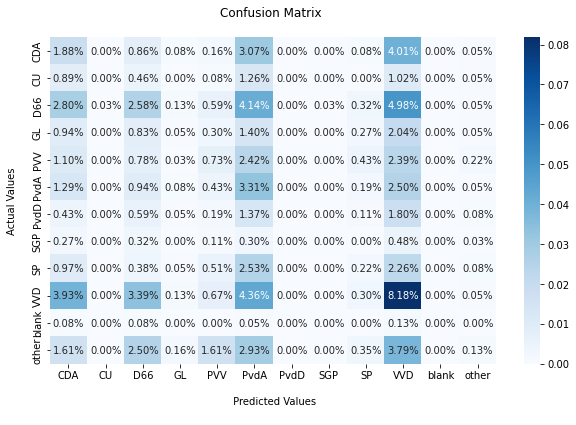

In [ ]:
plot_confusion(y_test_ind, pred_ind)

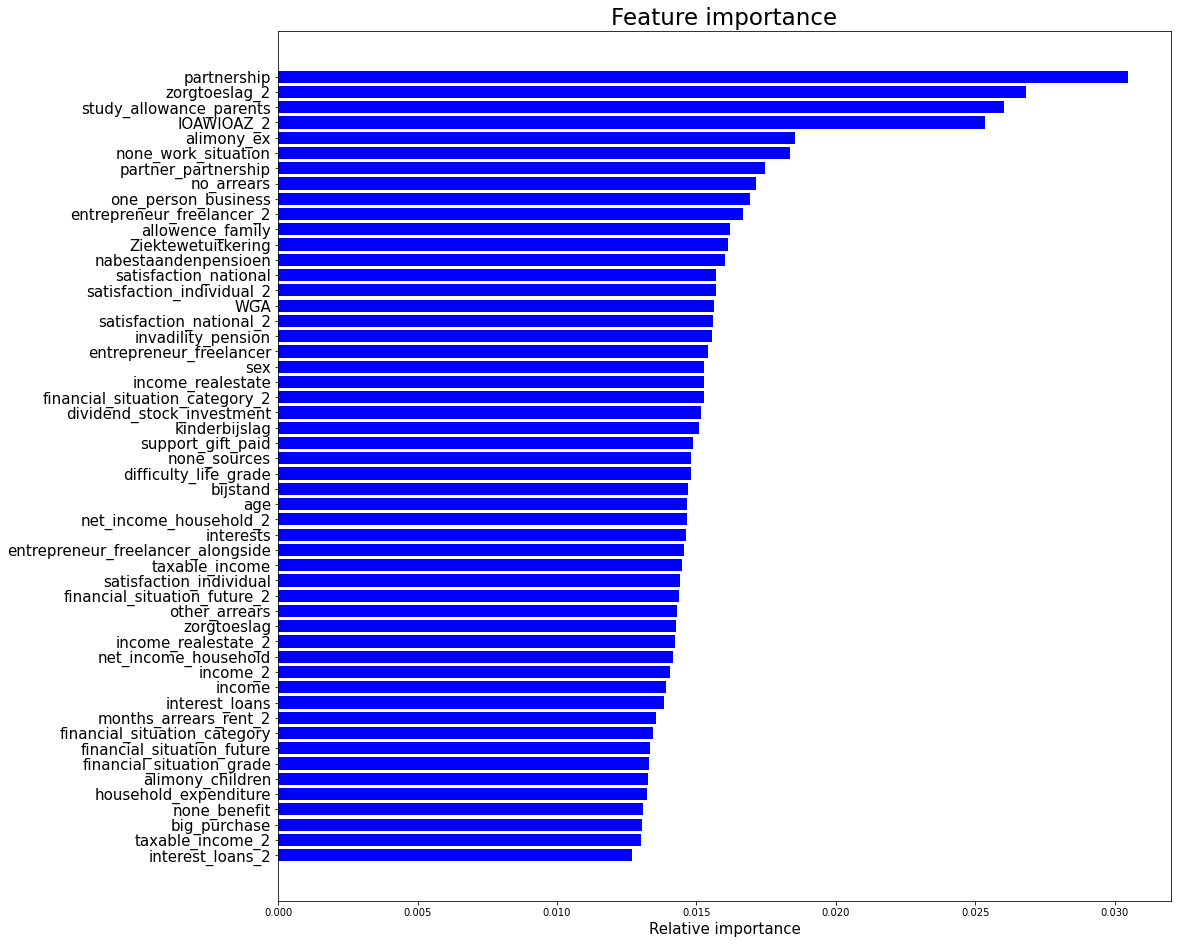

In [ ]:
plot_feature_importance(train_set_ind, xgb_ind, 52)

_Valence_

In [44]:
xgb_val = XGBClassifier(max_depth=14, eta=0.001, random_state=42)

xgb_val.fit(X_train_val,y_train_val) 

pred_val = xgb_val.predict(X_test_val)

In [ ]:
print(classification_report(y_test_val, pred_val, zero_division=1))

              precision    recall  f1-score   support

           0       0.26      0.22      0.24       379
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       582
           3       0.19      0.01      0.03       219
           4       0.16      0.08      0.10       301
           5       0.20      0.68      0.31       327
           6       0.08      0.01      0.01       172
           7       0.00      0.00      0.00        56
           8       0.12      0.02      0.03       260
           9       0.43      0.86      0.57       781
          10       0.00      0.00      0.00        13
          11       0.33      0.01      0.03       487

    accuracy                           0.27      3717
   macro avg       0.15      0.16      0.11      3717
weighted avg       0.21      0.27      0.19      3717



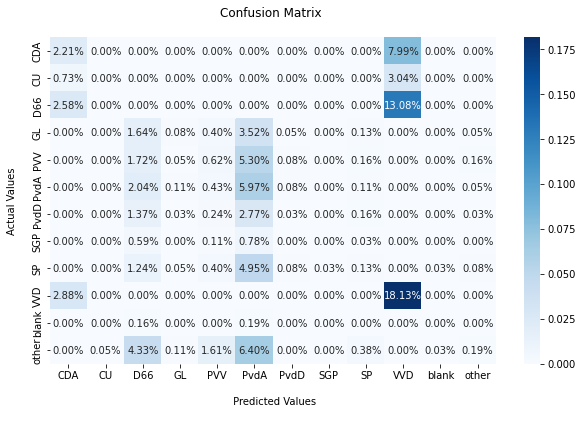

In [ ]:
plot_confusion(y_test_val, pred_val)

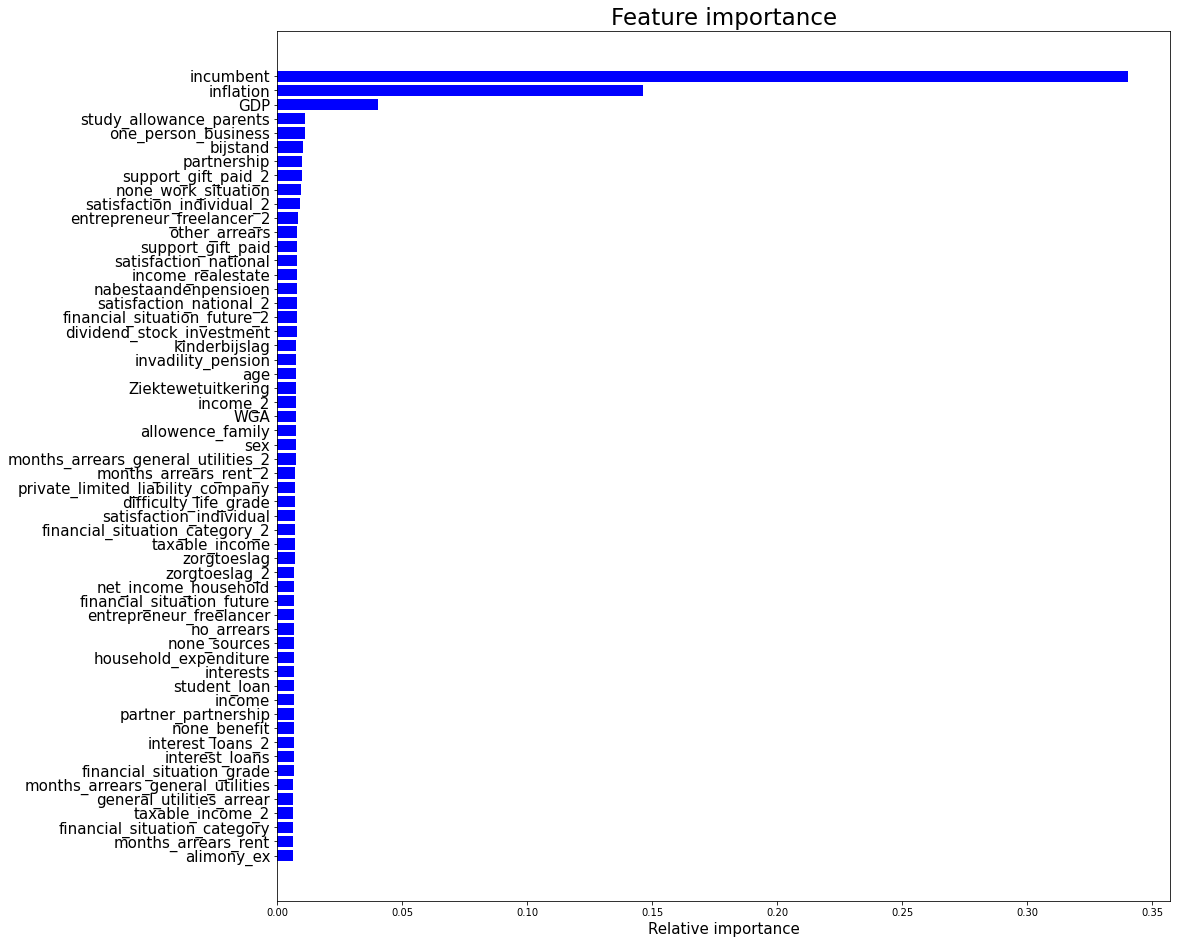

In [ ]:
plot_feature_importance(train_set_val, xgb_val, 56)

&nbsp;

&nbsp;

__precision score__

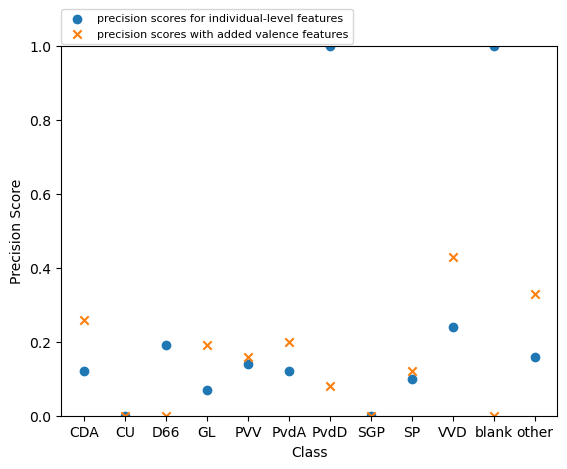

In [107]:
precision_ind_xgb = [0.12,0,0.19,0.07,0.14,0.12,1,0,0.1,0.24,1,0.16]
precision_val_xgb = [0.26,0,0,0.19,0.16,0.2,0.08,0,0.12,0.43,0,0.33]

plt.scatter(range(12), precision_ind_xgb, label='precision scores for individual-level features', marker='o')
plt.scatter(range(12), precision_val_xgb, label='precision scores with added valence features', marker='x')

plt.legend(fontsize=8, bbox_to_anchor=(0, 1,1,0.1), loc=2, borderaxespad=0.)
plt.ylim(0, 1)

plt.xticks(range(12), ['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Class')
plt.ylabel('Precision Score')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.2, 0.2))

plt.show()

__recall score__

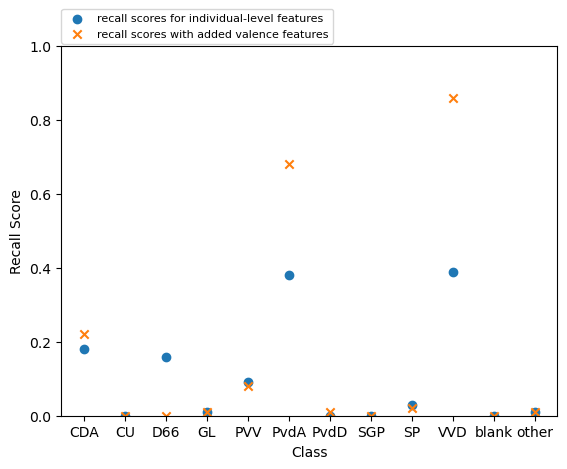

In [106]:
recall_ind = [0.18,0,0.16,0.01,0.09,0.38,0,0,0.03,0.39,0,0.01]
recall_val = [0.22,0,0,0.01,0.08,0.68,0.01,0,0.02,0.86,0,0.01]

plt.scatter(range(12), recall_ind, label='recall scores for individual-level features', marker='o')
plt.scatter(range(12), recall_val, label='recall scores with added valence features', marker='x')

plt.legend(fontsize=8, bbox_to_anchor=(0, 1,1,0.1), loc=2, borderaxespad=0.)

plt.xticks(range(12), ['CDA', 'CU', 'D66','GL','PVV','PvdA','PvdD','SGP','SP','VVD','blank', 'other'])

plt.xlabel('Class')
plt.ylabel('Recall Score')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.2, 0.2))

plt.show()

&nbsp;

### Datapoints excluding "I prefer not to say" answers:

__Individual__

In [ ]:
xgb_ind.fit(X_subset_013_ind,y_subset_013_ind)
pred_ind2 = xgb_ind.predict(X_test_ind)

In [ ]:
print(classification_report(y_test_ind, pred_ind2, zero_division=1))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14       379
           1       0.00      0.00      0.00       140
           2       0.20      0.19      0.19       582
           3       0.08      0.01      0.02       219
           4       0.16      0.12      0.14       301
           5       0.11      0.40      0.18       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.07      0.02      0.03       260
           9       0.25      0.33      0.29       781
          10       1.00      0.00      0.00        13
          11       0.22      0.02      0.04       487

    accuracy                           0.17      3717
   macro avg       0.18      0.11      0.09      3717
weighted avg       0.16      0.17      0.14      3717



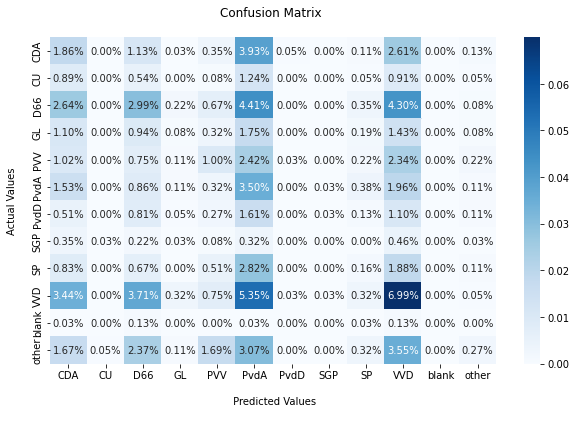

In [ ]:
plot_confusion(y_test_ind, pred_ind2)

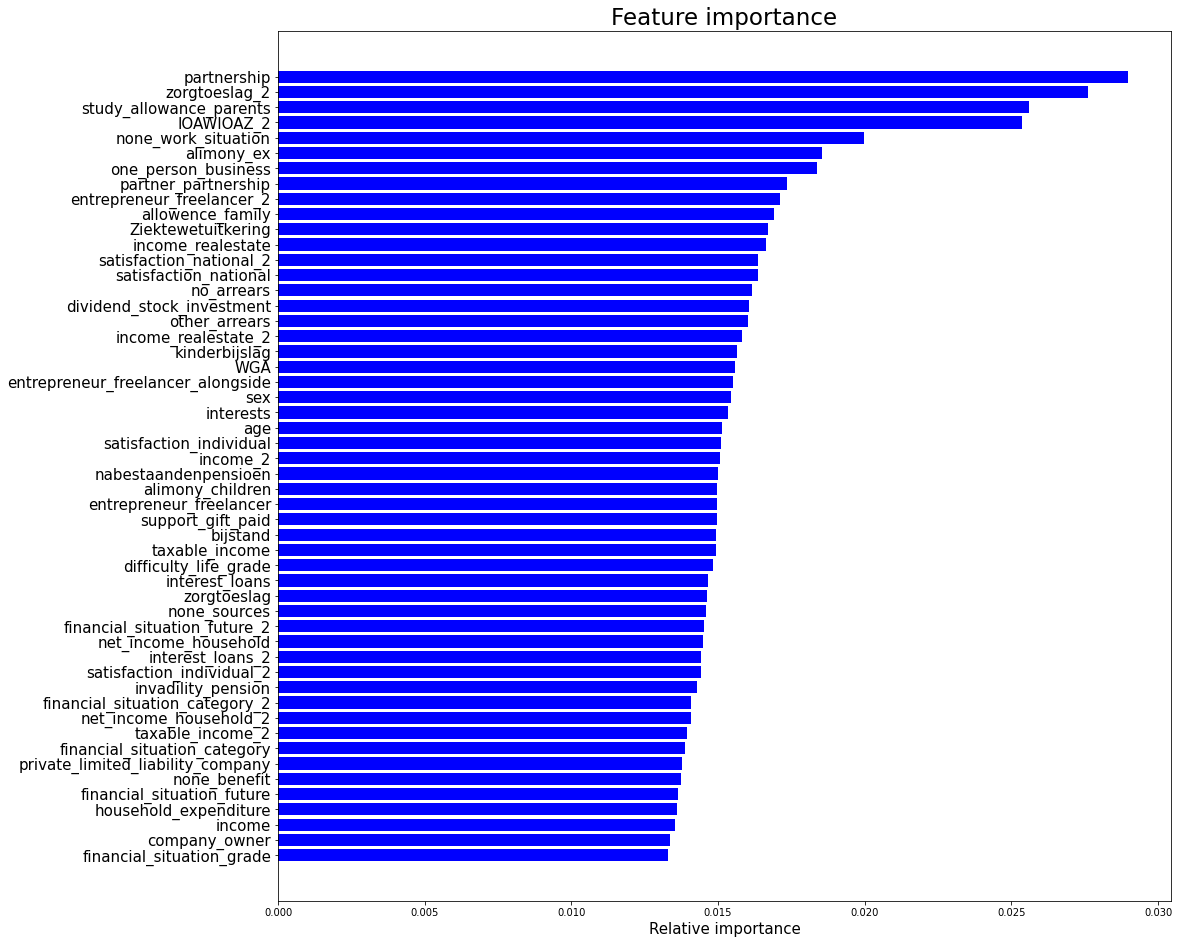

In [ ]:
plot_feature_importance(train_set_ind, xgb_ind, 52)

&nbsp;

__Valence__

In [ ]:
xgb_val.fit(X_subset_013_val,y_subset_013_val)
pred_val2 = xgb_val.predict(X_test_val)

In [ ]:
print(classification_report(y_test_val, pred_val2, zero_division=1))

              precision    recall  f1-score   support

           0       0.27      0.18      0.22       379
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       582
           3       0.30      0.01      0.03       219
           4       0.23      0.07      0.11       301
           5       0.19      0.76      0.31       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.12      0.02      0.04       260
           9       0.43      0.89      0.58       781
          10       0.00      0.00      0.00        13
          11       0.26      0.01      0.02       487

    accuracy                           0.28      3717
   macro avg       0.15      0.16      0.11      3717
weighted avg       0.21      0.28      0.19      3717



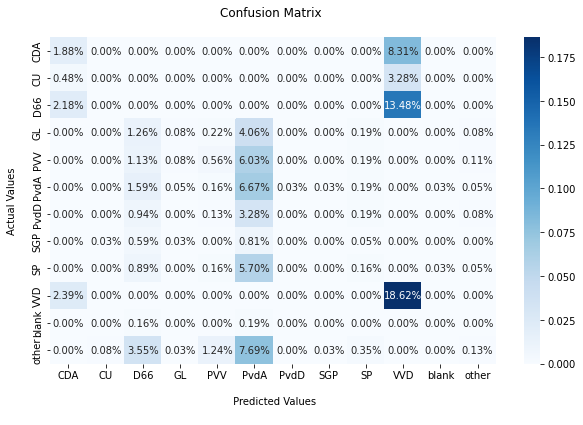

In [ ]:
plot_confusion(y_test_val, pred_val2)

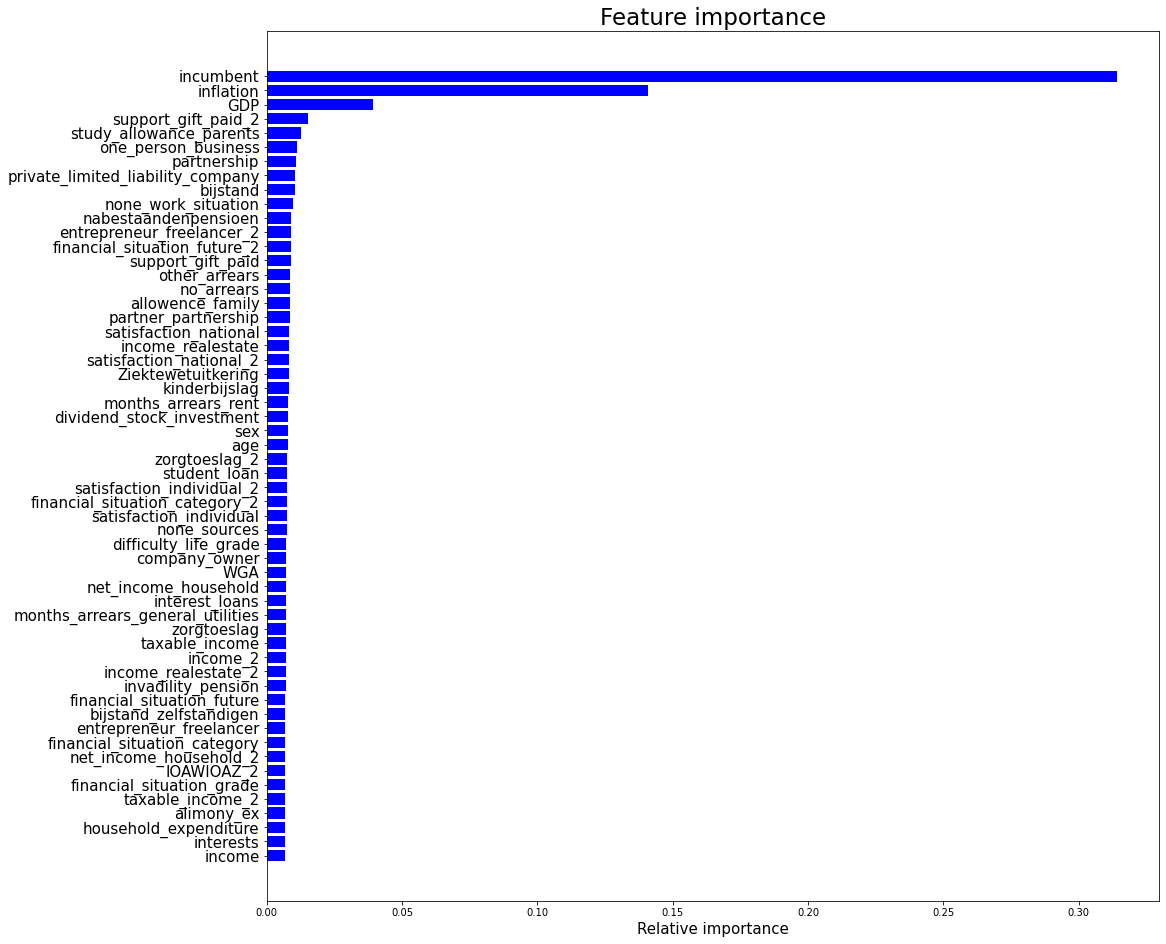

In [ ]:
plot_feature_importance(train_set_val, xgb_val, 56)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" & "I don't know" answers:

__Individual__

In [ ]:
xgb_ind.fit(X_subset_03_ind,y_subset_03_ind)
pred_ind3 = xgb_ind.predict(X_test_ind)

In [ ]:
print(classification_report(y_test_ind, pred_ind3, zero_division=1))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14       379
           1       0.00      0.00      0.00       140
           2       0.20      0.19      0.19       582
           3       0.08      0.01      0.02       219
           4       0.16      0.12      0.14       301
           5       0.11      0.40      0.18       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.07      0.02      0.03       260
           9       0.25      0.33      0.29       781
          10       1.00      0.00      0.00        13
          11       0.22      0.02      0.04       487

    accuracy                           0.17      3717
   macro avg       0.18      0.11      0.09      3717
weighted avg       0.16      0.17      0.14      3717



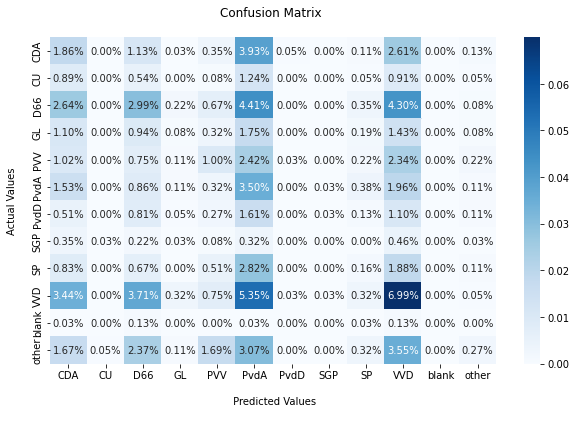

In [ ]:
plot_confusion(y_test_ind, pred_ind3)

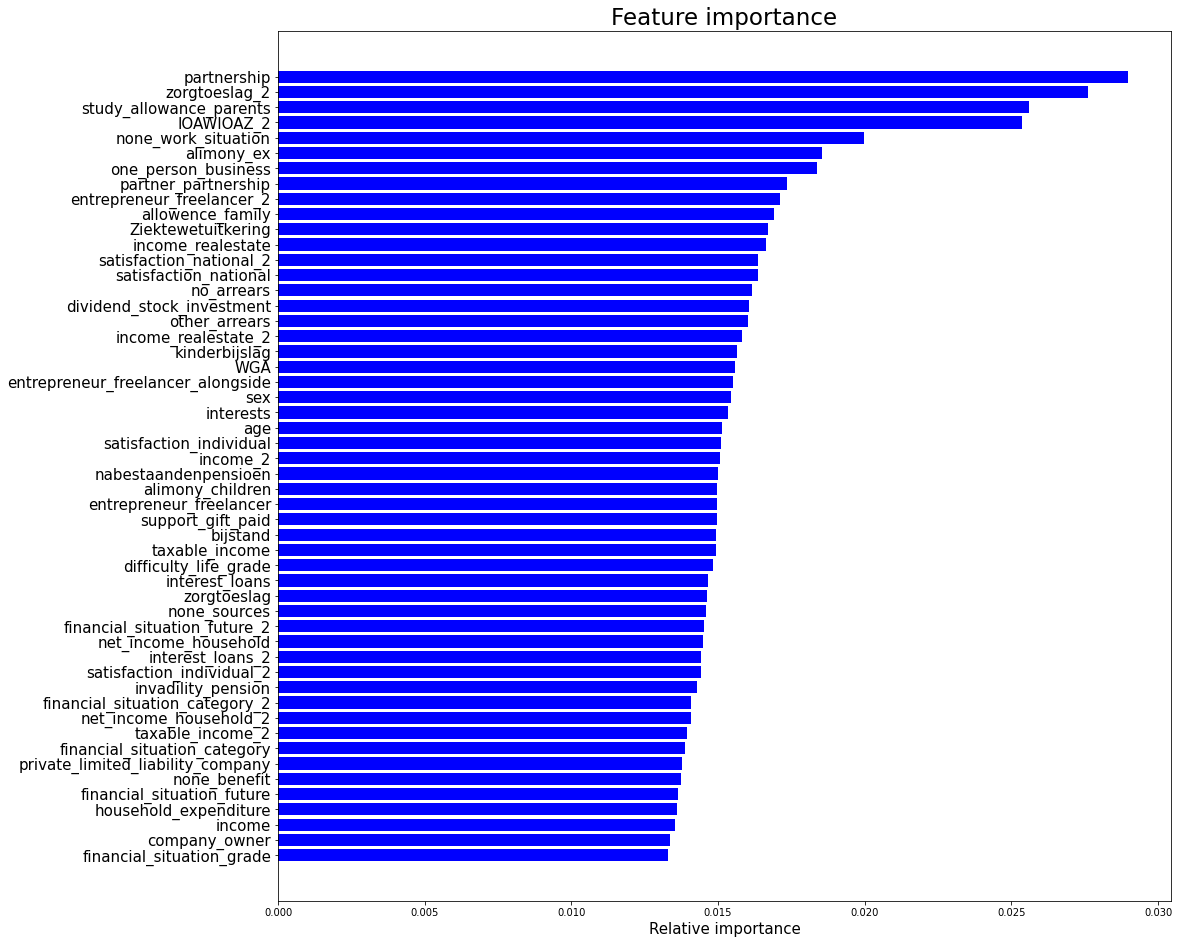

In [ ]:
plot_feature_importance(train_set_ind, xgb_ind, 52)

&nbsp;

__Valence__

In [ ]:
xgb_val.fit(X_subset_03_val,y_subset_03_val)
pred_val3 = xgb_val.predict(X_test_val)

In [ ]:
print(classification_report(y_test_val, pred_val3, zero_division=1))

              precision    recall  f1-score   support

           0       0.27      0.18      0.22       379
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       582
           3       0.30      0.01      0.03       219
           4       0.23      0.07      0.11       301
           5       0.19      0.76      0.31       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.12      0.02      0.04       260
           9       0.43      0.89      0.58       781
          10       0.00      0.00      0.00        13
          11       0.26      0.01      0.02       487

    accuracy                           0.28      3717
   macro avg       0.15      0.16      0.11      3717
weighted avg       0.21      0.28      0.19      3717



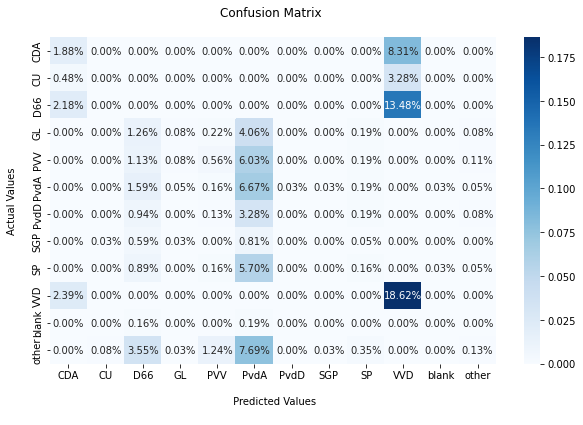

In [ ]:
plot_confusion(y_test_val, pred_val3)

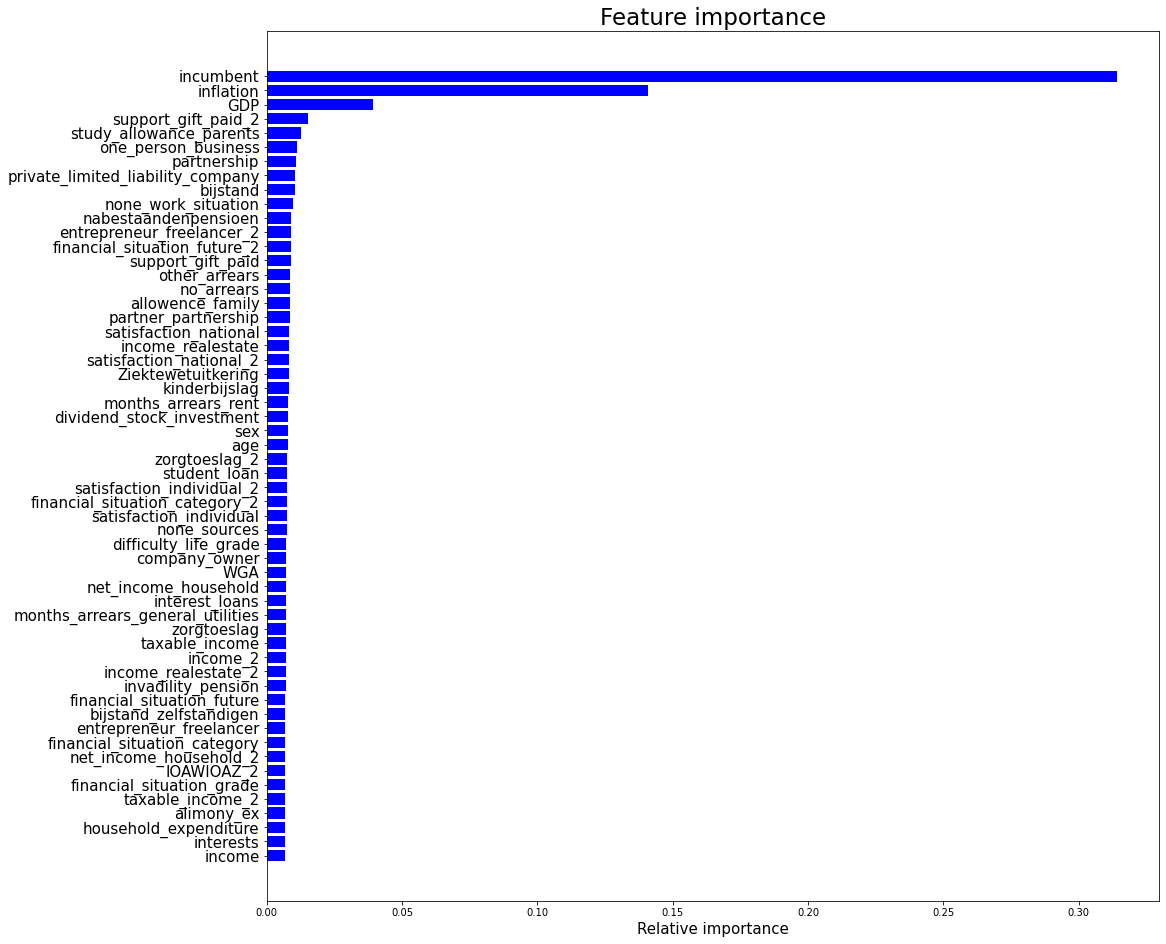

In [ ]:
plot_feature_importance(train_set_val, xgb_val, 56)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say", "I don't know" & NaN answers:

__Individual__

In [ ]:
xgb_ind.fit(X_subset_3_ind,y_subset_3_ind)
pred_ind4 = xgb_ind.predict(X_test_ind)

In [ ]:
print(classification_report(y_test_ind, pred_ind4, zero_division=1))

              precision    recall  f1-score   support

           0       0.12      0.18      0.14       379
           1       0.00      0.00      0.00       140
           2       0.20      0.19      0.19       582
           3       0.08      0.01      0.02       219
           4       0.16      0.12      0.14       301
           5       0.11      0.40      0.18       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.07      0.02      0.03       260
           9       0.25      0.33      0.29       781
          10       1.00      0.00      0.00        13
          11       0.22      0.02      0.04       487

    accuracy                           0.17      3717
   macro avg       0.18      0.11      0.09      3717
weighted avg       0.16      0.17      0.14      3717



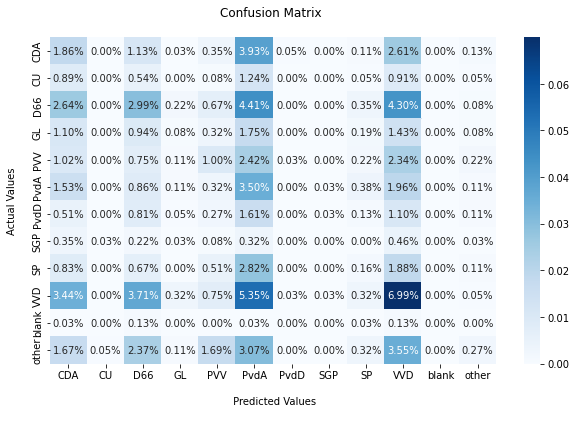

In [ ]:
plot_confusion(y_test_ind, pred_ind4)

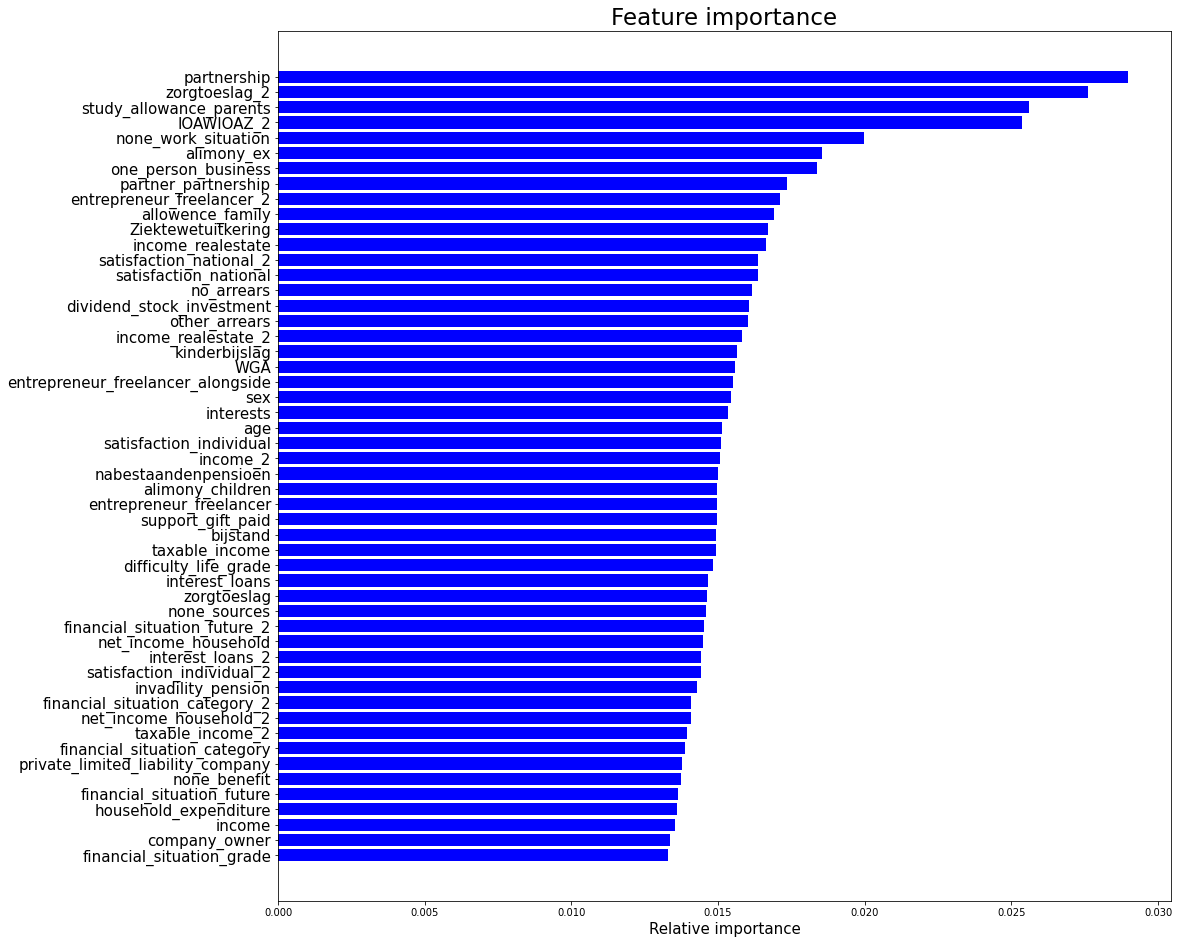

In [ ]:
plot_feature_importance(train_set_ind, xgb_ind, 52)

&nbsp;

__Valence__

In [ ]:
xgb_val.fit(X_subset_3_val,y_subset_3_val)
pred_val4 = xgb_val.predict(X_test_val)

In [ ]:
print(classification_report(y_test_val, pred_val4, zero_division=1))

              precision    recall  f1-score   support

           0       0.27      0.18      0.22       379
           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       582
           3       0.30      0.01      0.03       219
           4       0.23      0.07      0.11       301
           5       0.19      0.76      0.31       327
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        56
           8       0.12      0.02      0.04       260
           9       0.43      0.89      0.58       781
          10       0.00      0.00      0.00        13
          11       0.26      0.01      0.02       487

    accuracy                           0.28      3717
   macro avg       0.15      0.16      0.11      3717
weighted avg       0.21      0.28      0.19      3717



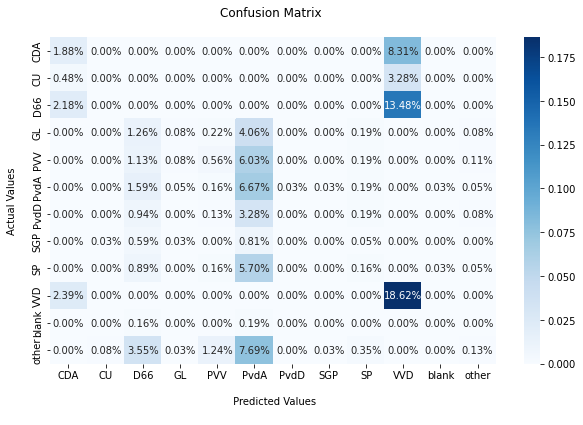

In [ ]:
plot_confusion(y_test_val, pred_val4)

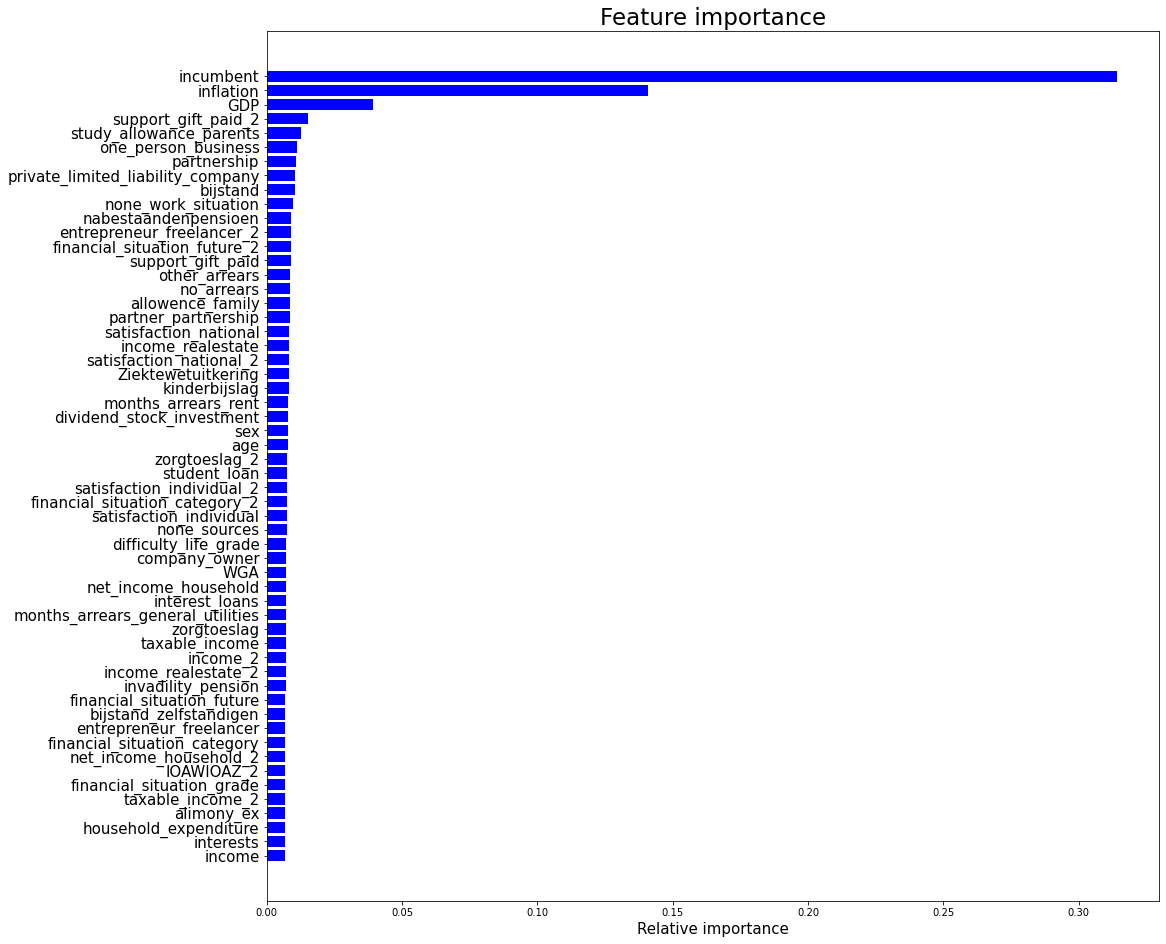

In [ ]:
plot_feature_importance(train_set_val, xgb_val, 56)

&nbsp;

&nbsp;

# In-built feature importances one plot (not model agnostic)

In [ ]:
column_names = train_set_val.columns.tolist()

print(column_names)

['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_real

In [ ]:
importances = xgb_val.feature_importances_

importances_string = ",".join([format(importance, 'f') for importance in importances])

print(importances_string)

0.007957,0.007768,0.007426,0.007459,0.008330,0.008202,0.006640,0.007130,0.006852,0.008917,0.006292,0.000000,0.011277,0.000000,0.007235,0.000000,0.010950,0.000000,0.008472,0.000000,0.010509,0.000000,0.006046,0.000000,0.009813,0.000000,0.007177,0.007629,0.008159,0.000000,0.006069,0.000000,0.009109,0.000000,0.010396,0.000000,0.006959,0.000000,0.004839,0.006743,0.007230,0.000000,0.007000,0.000000,0.008116,0.000000,0.006432,0.000000,0.008319,0.007117,0.005385,0.000000,0.007622,0.000000,0.006686,0.000000,0.005063,0.000000,0.012562,0.000000,0.008531,0.000000,0.007973,0.000000,0.006669,0.000000,0.007374,0.000000,0.007218,0.005567,0.008858,0.015435,0.007132,0.006712,0.007218,0.006771,0.006729,0.000000,0.007349,0.000000,0.006802,0.007444,0.006679,0.000000,0.006318,0.000000,0.006984,0.008913,0.008630,0.004768,0.005146,0.000000,0.005922,0.000000,0.008683,0.000000,0.008003,0.003200,0.007194,0.005304,0.039458,0.141066,0.000000,0.314062


In [ ]:
importances = rf_clf_val.feature_importances_

importances_string = ",".join([format(importance, 'f') for importance in importances])

print(importances_string)

0.022738,0.089060,0.051416,0.000000,0.058606,0.000000,0.017912,0.000000,0.002956,0.000000,0.001810,0.000000,0.003486,0.000000,0.000953,0.000000,0.000242,0.000000,0.001406,0.000000,0.002471,0.000000,0.000583,0.000000,0.007174,0.000000,0.012796,0.000000,0.003171,0.000000,0.001385,0.000000,0.004294,0.000000,0.001310,0.000000,0.000303,0.000000,0.000820,0.000000,0.003421,0.000000,0.001492,0.000000,0.008536,0.000000,0.015219,0.000000,0.004487,0.000000,0.001626,0.000000,0.000706,0.000000,0.001541,0.000000,0.001593,0.000000,0.001057,0.000000,0.002067,0.000000,0.012157,0.000000,0.015045,0.000000,0.014451,0.000000,0.012768,0.000000,0.010868,0.000000,0.090452,0.000000,0.091428,0.000000,0.054317,0.000000,0.057567,0.000000,0.037746,0.000000,0.031382,0.000000,0.019632,0.000000,0.037733,0.000000,0.002561,0.000000,0.000625,0.000000,0.000981,0.000000,0.002209,0.000000,0.000873,0.000000,0.000590,0.000000,0.029805,0.032690,0.031260,0.086221


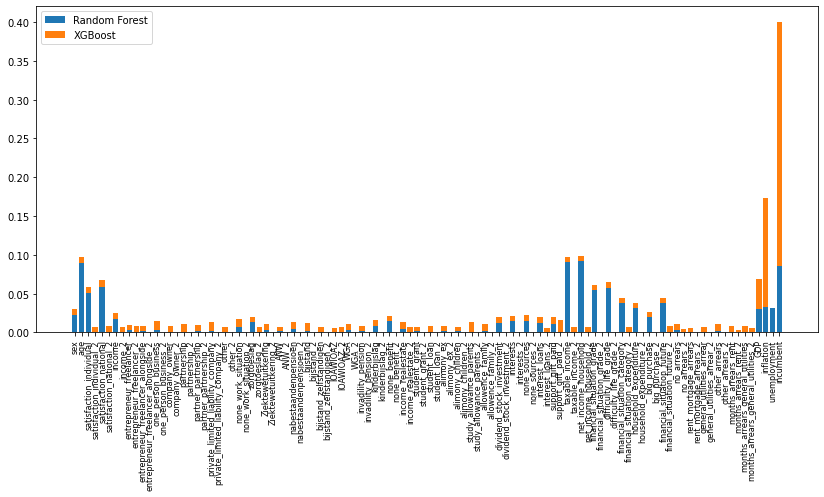

<Figure size 432x288 with 0 Axes>

In [54]:
importances_1 = [0.022738,0.089060,0.051416,0.000000,0.058606,0.000000,0.017912,0.000000,0.002956,0.000000,0.001810,0.000000,0.003486,0.000000,0.000953,0.000000,0.000242,0.000000,0.001406,0.000000,0.002471,0.000000,0.000583,0.000000,0.007174,0.000000,0.012796,0.000000,0.003171,0.000000,0.001385,0.000000,0.004294,0.000000,0.001310,0.000000,0.000303,0.000000,0.000820,0.000000,0.003421,0.000000,0.001492,0.000000,0.008536,0.000000,0.015219,0.000000,0.004487,0.000000,0.001626,0.000000,0.000706,0.000000,0.001541,0.000000,0.001593,0.000000,0.001057,0.000000,0.002067,0.000000,0.012157,0.000000,0.015045,0.000000,0.014451,0.000000,0.012768,0.000000,0.010868,0.000000,0.090452,0.000000,0.091428,0.000000,0.054317,0.000000,0.057567,0.000000,0.037746,0.000000,0.031382,0.000000,0.019632,0.000000,0.037733,0.000000,0.002561,0.000000,0.000625,0.000000,0.000981,0.000000,0.002209,0.000000,0.000873,0.000000,0.000590,0.000000,0.029805,0.032690,0.031260,0.086221]

feature_names_1 = ['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'incumbent']

importances_2 = [0.007957,0.007768,0.007426,0.007459,0.008330,0.008202,0.006640,0.007130,0.006852,0.008917,0.006292,0.000000,0.011277,0.000000,0.007235,0.000000,0.010950,0.000000,0.008472,0.000000,0.010509,0.000000,0.006046,0.000000,0.009813,0.000000,0.007177,0.007629,0.008159,0.000000,0.006069,0.000000,0.009109,0.000000,0.010396,0.000000,0.006959,0.000000,0.004839,0.006743,0.007230,0.000000,0.007000,0.000000,0.008116,0.000000,0.006432,0.000000,0.008319,0.007117,0.005385,0.000000,0.007622,0.000000,0.006686,0.000000,0.005063,0.000000,0.012562,0.000000,0.008531,0.000000,0.007973,0.000000,0.006669,0.000000,0.007374,0.000000,0.007218,0.005567,0.008858,0.015435,0.007132,0.006712,0.007218,0.006771,0.006729,0.000000,0.007349,0.000000,0.006802,0.007444,0.006679,0.000000,0.006318,0.000000,0.006984,0.008913,0.008630,0.004768,0.005146,0.000000,0.005922,0.000000,0.008683,0.000000,0.008003,0.003200,0.007194,0.005304,0.039458,0.141066,0.000000,0.314062]
feature_names_2 = ['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'incumbent']

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(range(len(importances_1)), importances_1, label='Random Forest')

ax.bar(range(len(importances_2)), importances_2, bottom=importances_1, label='XGBoost')

ax.set_xticks(range(len(importances_2)))
ax.set_xticklabels(feature_names_2, rotation=90, fontsize=8)

ax.legend()

plt.show()
plt.savefig("test.pdf")

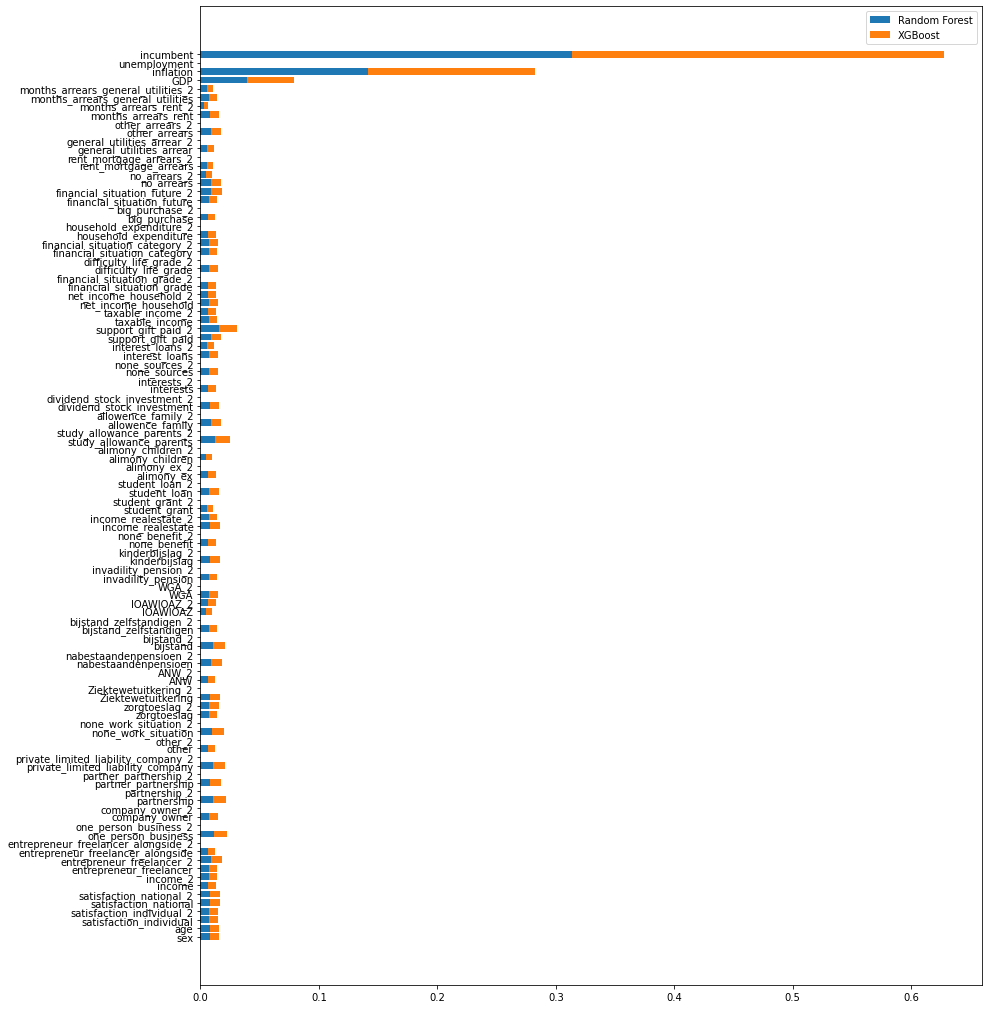

In [55]:
feature_importance_1 = [0.007957,0.007768,0.007426,0.007459,0.008330,0.008202,0.006640,0.007130,0.006852,0.008917,0.006292,0.000000,0.011277,0.000000,0.007235,0.000000,0.010950,0.000000,0.008472,0.000000,0.010509,0.000000,0.006046,0.000000,0.009813,0.000000,0.007177,0.007629,0.008159,0.000000,0.006069,0.000000,0.009109,0.000000,0.010396,0.000000,0.006959,0.000000,0.004839,0.006743,0.007230,0.000000,0.007000,0.000000,0.008116,0.000000,0.006432,0.000000,0.008319,0.007117,0.005385,0.000000,0.007622,0.000000,0.006686,0.000000,0.005063,0.000000,0.012562,0.000000,0.008531,0.000000,0.007973,0.000000,0.006669,0.000000,0.007374,0.000000,0.007218,0.005567,0.008858,0.015435,0.007132,0.006712,0.007218,0.006771,0.006729,0.000000,0.007349,0.000000,0.006802,0.007444,0.006679,0.000000,0.006318,0.000000,0.006984,0.008913,0.008630,0.004768,0.005146,0.000000,0.005922,0.000000,0.008683,0.000000,0.008003,0.003200,0.007194,0.005304,0.039458,0.141066,0.000000,0.314062]

feature_importance_2 = [0.007957,0.007768,0.007426,0.007459,0.008330,0.008202,0.006640,0.007130,0.006852,0.008917,0.006292,0.000000,0.011277,0.000000,0.007235,0.000000,0.010950,0.000000,0.008472,0.000000,0.010509,0.000000,0.006046,0.000000,0.009813,0.000000,0.007177,0.007629,0.008159,0.000000,0.006069,0.000000,0.009109,0.000000,0.010396,0.000000,0.006959,0.000000,0.004839,0.006743,0.007230,0.000000,0.007000,0.000000,0.008116,0.000000,0.006432,0.000000,0.008319,0.007117,0.005385,0.000000,0.007622,0.000000,0.006686,0.000000,0.005063,0.000000,0.012562,0.000000,0.008531,0.000000,0.007973,0.000000,0.006669,0.000000,0.007374,0.000000,0.007218,0.005567,0.008858,0.015435,0.007132,0.006712,0.007218,0.006771,0.006729,0.000000,0.007349,0.000000,0.006802,0.007444,0.006679,0.000000,0.006318,0.000000,0.006984,0.008913,0.008630,0.004768,0.005146,0.000000,0.005922,0.000000,0.008683,0.000000,0.008003,0.003200,0.007194,0.005304,0.039458,0.141066,0.000000,0.314062]


features = ['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'incumbent']


fig, ax = plt.subplots(figsize=(14,18))
ax.barh(features, feature_importance_1, label='Random Forest')
ax.barh(features, feature_importance_2, left=feature_importance_1, label='XGBoost')
ax.legend()

ax.tick_params(axis='y', labelsize=10)

plt.show()

&nbsp;

&nbsp;

## Permutation

In [47]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import make_scorer

&nbsp;

### Random Forest permutation

In [48]:
feature_names = ['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'incumbent']

rf_clf_val.fit(X_train_val, y_train_val)

f1_scorer = make_scorer(f1_score, average='macro')

perm = PermutationImportance(rf_clf_val, random_state=20, scoring=f1_scorer, n_iter=10).fit(X_test_val, y_test_val)

eli5.show_weights(perm, feature_names=feature_names)

In [49]:
eli5.show_weights(perm, feature_names=feature_names, top=None)

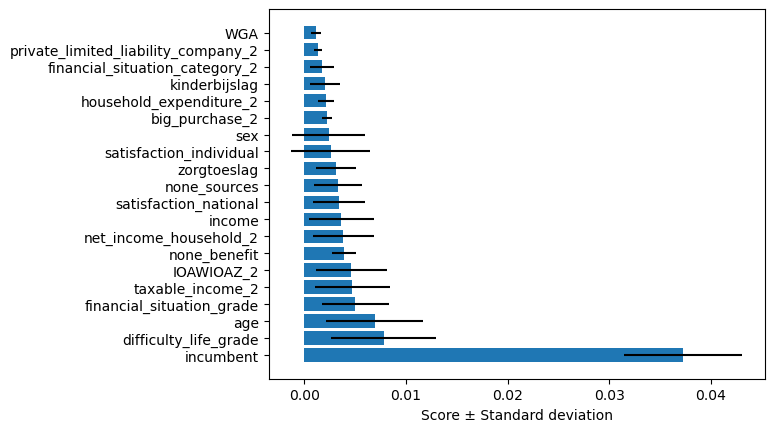

In [9]:
scores = [0.0373,0.0078, 
0.0069,
0.0050, 
0.0047, 
0.0046 ,
0.0039, 
0.0038, 
0.0036, 
0.0034 ,
0.0033,
0.0031,
0.0026,
0.0024,
0.0022,
0.0021,
0.0020,
0.0017,
0.0013,
0.0011]
stddevs = [0.0058, 0.0052, 0.0048, 0.0033, 0.0037, 0.0035, 0.0012, 0.0030, 0.0032, 
           0.0026, 0.0024, 0.0020, 0.0039, 0.0036, 0.0005, 0.0008, 0.0015, 0.0012, 0.0004, 0.0005]
features = ['incumbent', 'difficulty_life_grade', 'age', 'financial_situation_grade', 'taxable_income_2', 'IOAWIOAZ_2', 'none_benefit', 'net_income_household_2', 
                 'income', 'satisfaction_national', 'none_sources', 'zorgtoeslag', 'satisfaction_individual', 'sex', 'big_purchase_2', 'household_expenditure_2', 
                 'kinderbijslag', 'financial_situation_category_2', 'private_limited_liability_company_2', 'WGA']

plt.barh(features, scores, xerr=stddevs)
plt.xlabel("Score ± Standard deviation")
plt.show()

&nbsp;

&nbsp;

### XGBoost permutation

In [50]:
feature_names = ['sex', 'age', 'satisfaction_individual', 'satisfaction_individual_2', 'satisfaction_national', 'satisfaction_national_2', 'income', 'income_2', 'entrepreneur_freelancer', 'entrepreneur_freelancer_2', 'entrepreneur_freelancer_alongside', 'entrepreneur_freelancer_alongside_2', 'one_person_business', 'one_person_business_2', 'company_owner', 'company_owner_2', 'partnership', 'partnership_2', 'partner_partnership', 'partner_partnership_2', 'private_limited_liability_company', 'private_limited_liability_company_2', 'other', 'other_2', 'none_work_situation', 'none_work_situation_2', 'zorgtoeslag', 'zorgtoeslag_2', 'Ziektewetuitkering', 'Ziektewetuitkering_2', 'ANW', 'ANW_2', 'nabestaandenpensioen', 'nabestaandenpensioen_2', 'bijstand', 'bijstand_2', 'bijstand_zelfstandigen', 'bijstand_zelfstandigen_2', 'IOAWIOAZ', 'IOAWIOAZ_2', 'WGA', 'WGA_2', 'invadility_pension', 'invadility_pension_2', 'kinderbijslag', 'kinderbijslag_2', 'none_benefit', 'none_benefit_2', 'income_realestate', 'income_realestate_2', 'student_grant', 'student_grant_2', 'student_loan', 'student_loan_2', 'alimony_ex', 'alimony_ex_2', 'alimony_children', 'alimony_children_2', 'study_allowance_parents', 'study_allowance_parents_2', 'allowence_family', 'allowence_family_2', 'dividend_stock_investment', 'dividend_stock_investment_2', 'interests', 'interests_2', 'none_sources', 'none_sources_2', 'interest_loans', 'interest_loans_2', 'support_gift_paid', 'support_gift_paid_2', 'taxable_income', 'taxable_income_2', 'net_income_household', 'net_income_household_2', 'financial_situation_grade', 'financial_situation_grade_2', 'difficulty_life_grade', 'difficulty_life_grade_2', 'financial_situation_category', 'financial_situation_category_2', 'household_expenditure', 'household_expenditure_2', 'big_purchase', 'big_purchase_2', 'financial_situation_future', 'financial_situation_future_2', 'no_arrears', 'no_arrears_2', 'rent_mortgage_arrears', 'rent_mortgage_arrears_2', 'general_utilities_arrear', 'general_utilities_arrear_2', 'other_arrears', 'other_arrears_2', 'months_arrears_rent', 'months_arrears_rent_2', 'months_arrears_general_utilities', 'months_arrears_general_utilities_2', 'GDP', 'inflation', 'unemployment', 'incumbent']

xgb_val.fit(X_train_val, y_train_val)

xgb_perm = PermutationImportance(xgb_val, random_state=21, scoring=f1_scorer, n_iter=10).fit(X_test_val, y_test_val)

eli5.show_weights(xgb_perm, feature_names=feature_names)

In [51]:
eli5.show_weights(xgb_perm, feature_names=feature_names, top=None)

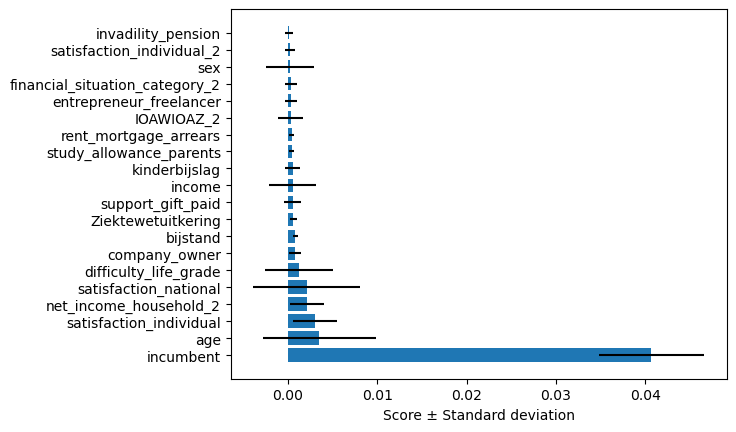

In [8]:
scores = [0.0407, 0.0035, 0.0030, 0.0021, 0.0021, 0.0012, 0.0008, 0.0008, 0.0006, 0.0005, 
          0.0005, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0001]
stddevs = [0.0059, 0.0063, 0.0025, 0.0019, 0.0060, 0.0038, 0.0007, 0.0003, 0.0004, 
           0.0010, 0.0026, 0.0008, 0.0003, 0.0003, 0.0014, 0.0007, 0.0007, 0.0027, 0.0006, 0.0004]
features = ["incumbent", "age", "satisfaction_individual", "net_income_household_2", "satisfaction_national", 
            "difficulty_life_grade", "company_owner", "bijstand", "Ziektewetuitkering", "support_gift_paid", "income", 
            "kinderbijslag", "study_allowance_parents", "rent_mortgage_arrears", "IOAWIOAZ_2", "entrepreneur_freelancer", 
            "financial_situation_category_2", "sex", "satisfaction_individual_2", "invadility_pension"]

plt.barh(features, scores, xerr=stddevs)
plt.xlabel("Score ± Standard deviation")
plt.show()